# Spotify EDA

## Table of Contents
- [1. Introduction](#introduction)
   * [1-1. Datasets](#data)
   * [1-2. Motivation and Guiding Research Questions](#motivation)
   * [1-3. Methodology](#methodology)
-  [2. Data Exploration, Retrieval, and Cleaning](#section2)
   * [2-1. Obtaining top tracks in target countries from Spotify](#section2-1)
   * [2-2. Scraping Playlist Data from the Spotify API](#section2-2)
   * [2-3. Obtaining the artist data](#section2-3)
     * [2-3-1. Retrieving all artists from top playlists](#section2-3-1)
     * [2-3-2. Wiki Scraping Artist Origin and Birthplaces](#section2-3-2)
     * [2-3-3. Getting Artist Genres](#section2-3-3)
   * [2-4. Obtaining Song Data](#section2-4)
     * [2-4-1. Retrieving Artists' Top Songs and Popularity](#section2-4-1)
     * [2-4-2. Getting Song Features](#section2-4-2)
   * [2-5. Data Aggregation](#section2-5)
   * [2-6. Limitations of Data Collection Process](#section2-6)
-  [3. Exploratatory Data Visualisation and Analysis](#section3)
   * [3-1. Summary Statistics and Single Factor Visualisations](#section3-1)
   * [3-2. Multivariate Visualisations and Analysis](#section3-2)
     * [3-2-1. Scatterplot of Song Features and Popularity](#section3-2-1)
     * [3-2-2. Analysing correlationships between features and popularity](#section3-2-2)
     * [3-2-3. Random Forest Analysis](#section3-2-3)
     * [3-2-4. Predicting Popular Songs with Binary Classifiers](#section3-2-4)
-  [4. Conclusion](#section4)
-  [5. References](#references)

## 1. Introduction <a id="introduction"></a>

Spotify has developed an algorithm that tracks what people like and that suggests new music to users reaching unseen success. The feature "Your Spotify Wrapped" gives each user a personalised overview of their last year's music favourites, which people around the world share on Social Media each December.

The Spotify Wrapped playlists are very focused on a single user's activities on Spotify. Factors like the users liked songs, frequently listened albums, their location, and even the weather of the specific location all influence what Spotify suggests the user to hear (see exapmle here https://www.accuweather.com/en/press/63672538).

We are interested in not only how an individual user's music of 2023 can be described but which features the globally popular music of 2023 has. We want to take the Spotify Wrapped feature from a user level to a country and global level and analyse patterns and discover similarities between countries, artists, and popular songs.

### 1-1. Datasets <a id="data"></a>

We have been inspired by the playlists "Top Tracks of 2023" of individual countries. To have a sample representing music from all continents, we chose the "Top Tracks of 2023"-playlists from 6 different countries, namely United Kingdom, Canada, South Africa, Japan, Australia, and Peru (see screenshots below section 1-3).

We used both the Spotify API and Web Scraping to gain information on `artists`, `albums` and `tracks` data from Spotify, and `artist_location` or `artist_birthplace` from Wikipedia. We chose to retrieve origin and birthplace information from Wikipedia as it is an international database and so we felt it most likely to include the majority of artists.

The data is available in the `data` folder of this repository.

### 1-2. Motivation and Guiding Research Questions<a id="motivation"></a>



Our guiding research question is:

* Which features does the music and the most popular artists of 2023 have?

Further sub-questions are: 

* Which countries are the most popular artists from?

* Which features made a song popular in 2023?

* Can we see a correlation of popular genres, artists, and origin of artists?

### 1-3. Methodology <a id="methodology"></a>

The methodology for this project is as follows:

First we access the Top Tracks Playlist from each of the six countries via the Spotify API and extract the relevant information about the top artists from it and create a data set.
Then we add the artists' birth place and origin to the data set by scraping Wikipedia data.
We later add the artists' genre to the data set.

To get a wider range of top songs, for each artists we retrieve their most popular tracks via the Spotify API and add their features to the data set.

We end up with two main data frames, one giving information about artists, their origin, genre, top songs, one giving information about the top songs, their release dates, and features.

#### Data Exploration, retrieval, and cleaning

**Exploring Artists' information :**
* finding important origin locations for them (whether birthplace or where they started their music career)
* finding out what genre Spotify recognises them as 
* pulling their top 3 most popular songs to use as the basis for the next step (we did not use the playlist song because of the variability and the opaqueness of what this song actually represents)

**Exploring Songs information:**
* getting their features
* getting their numeric popularity (above 99% of other songs)
* getting their release dates

Throughout the process we have included pause points to export to CSV to allow for improved accesibility and review of data.

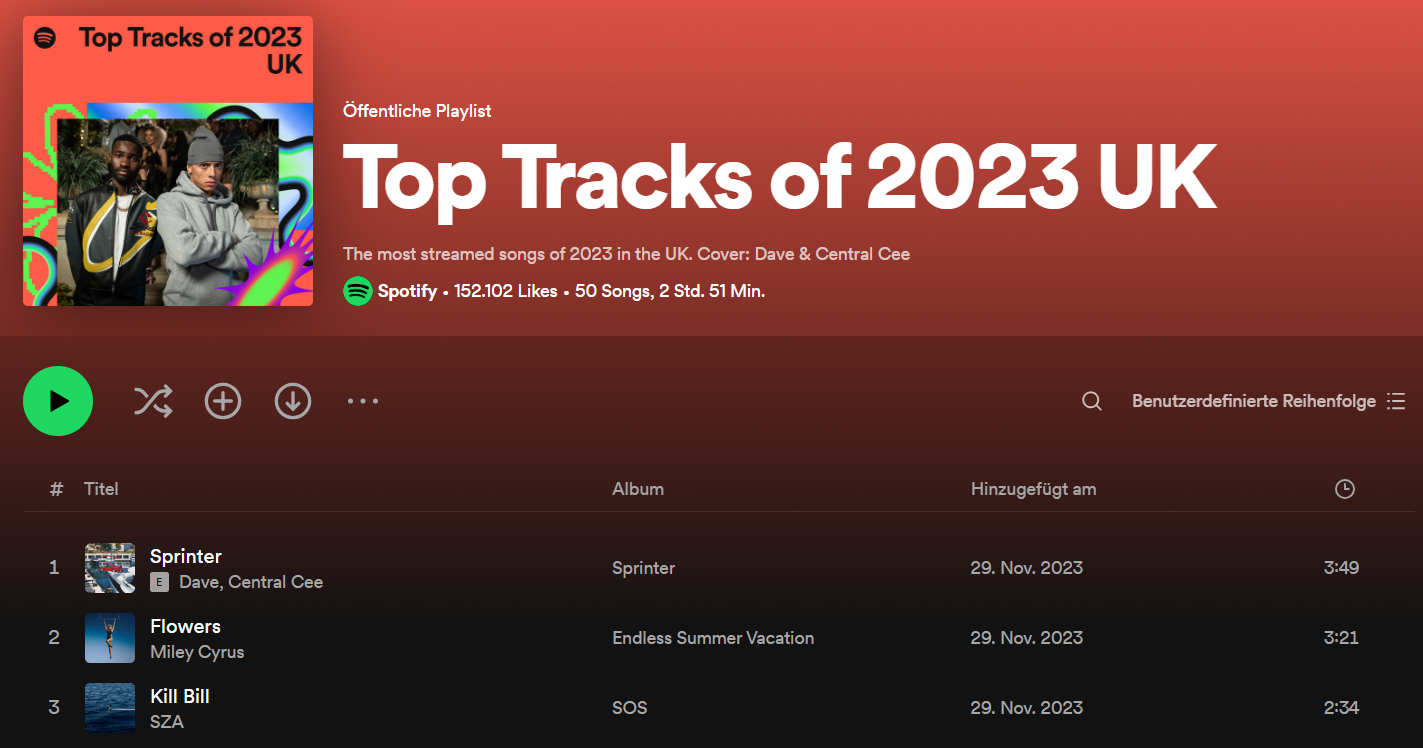

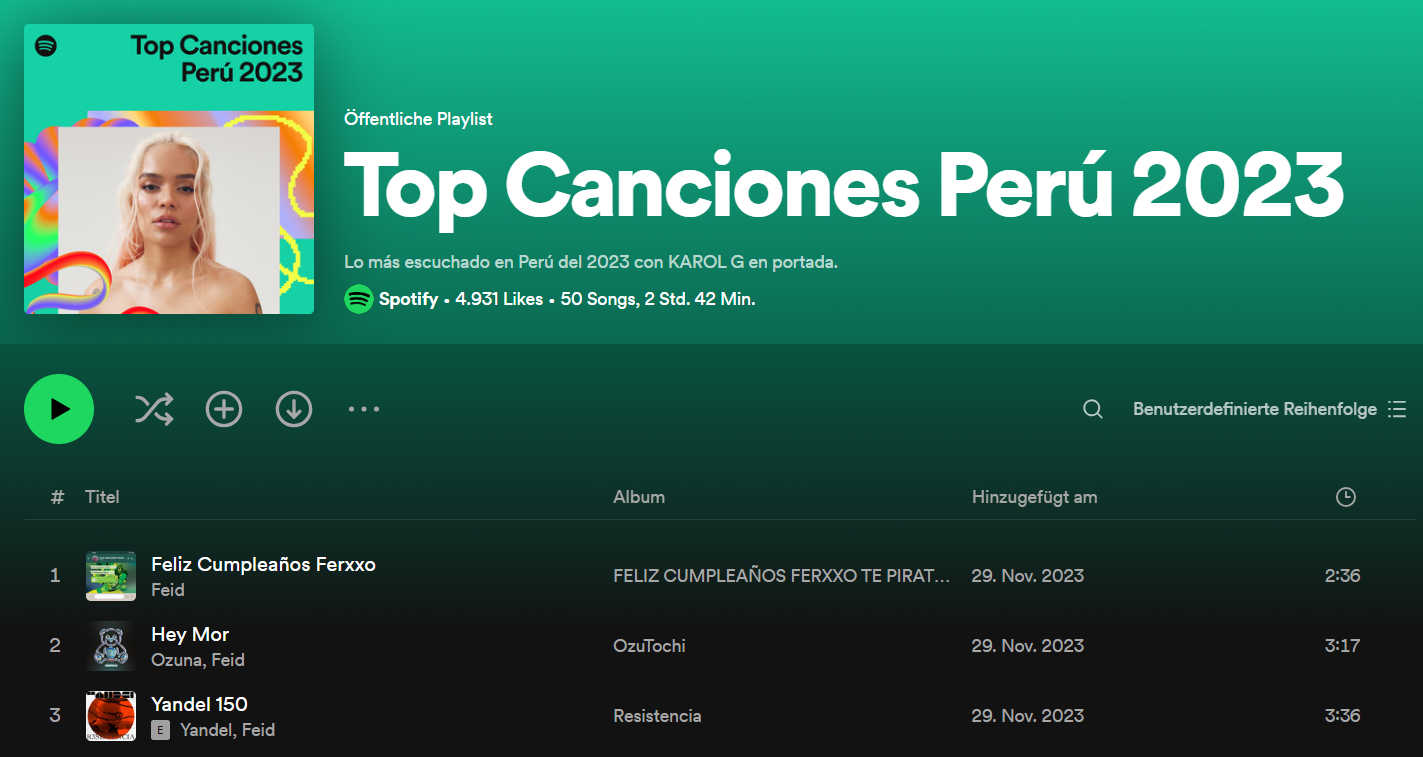

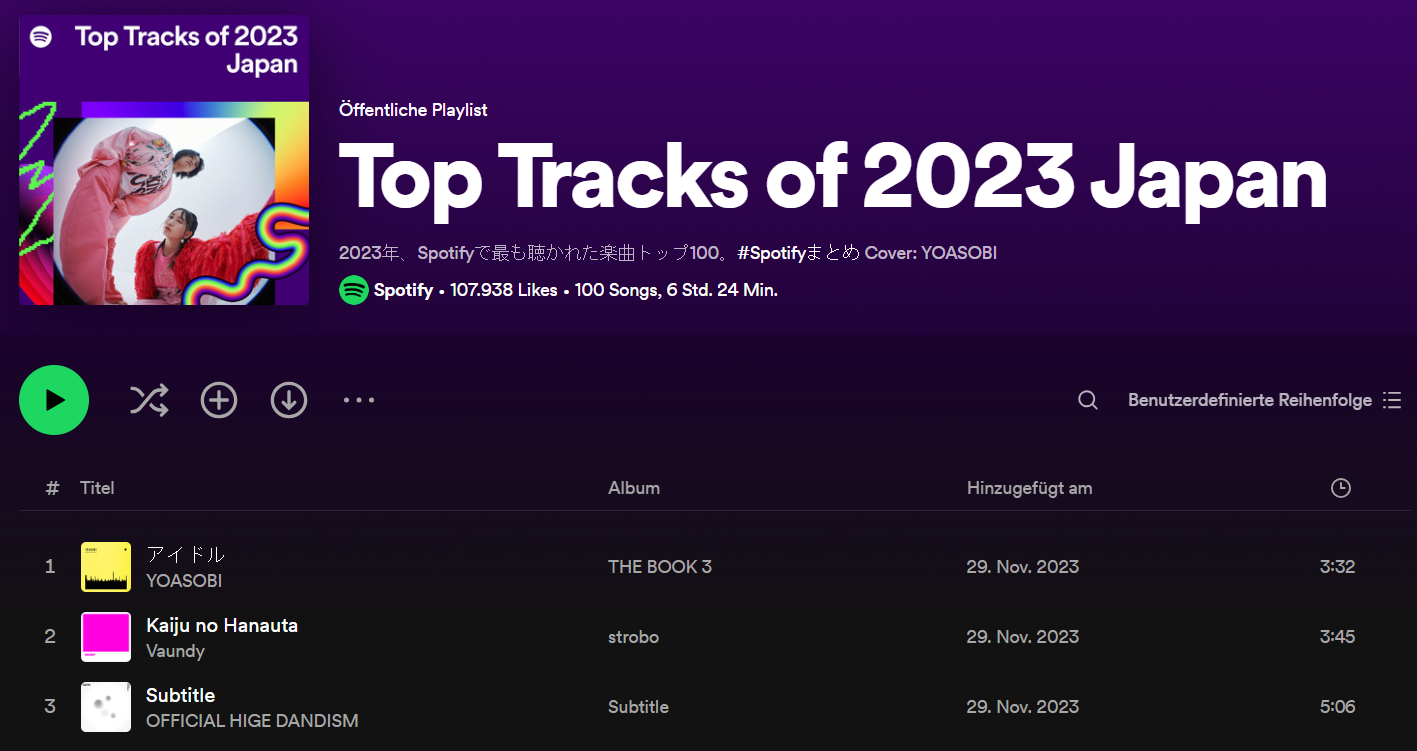

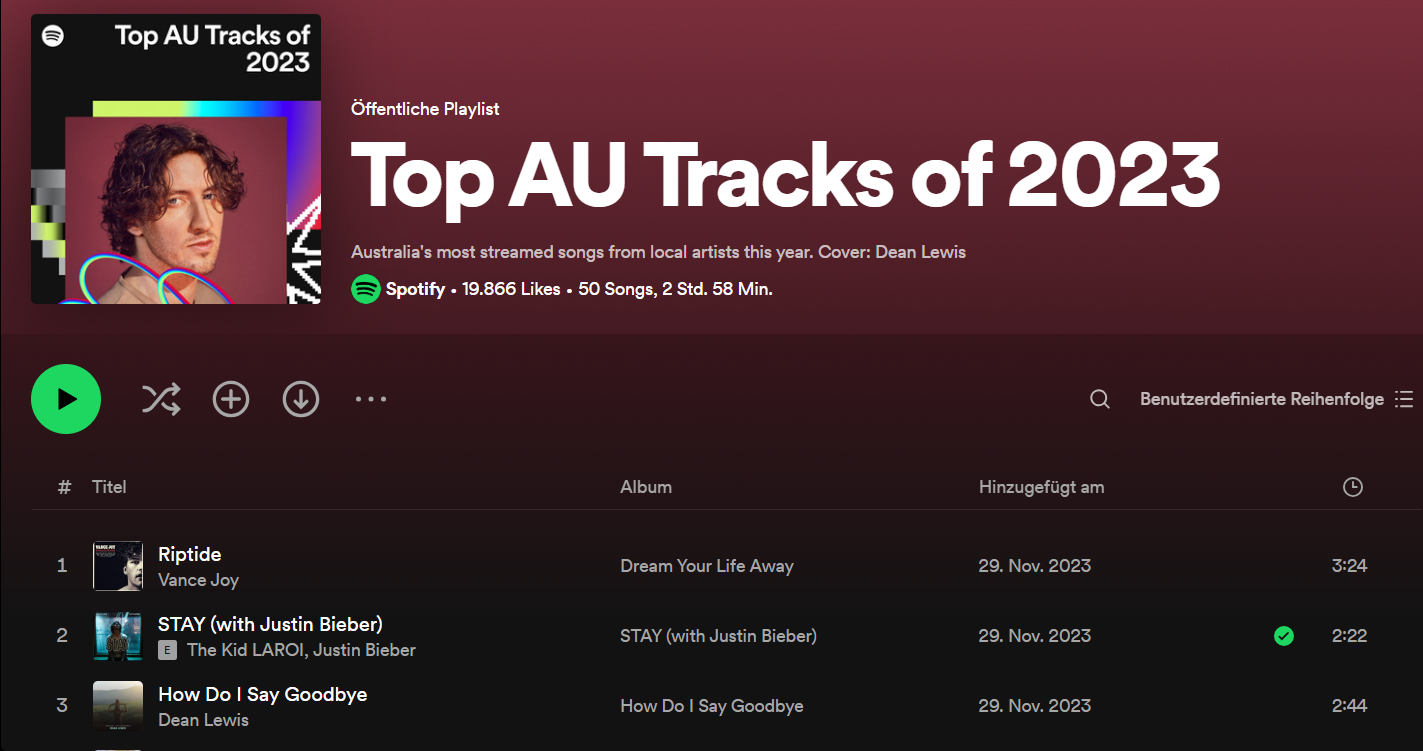

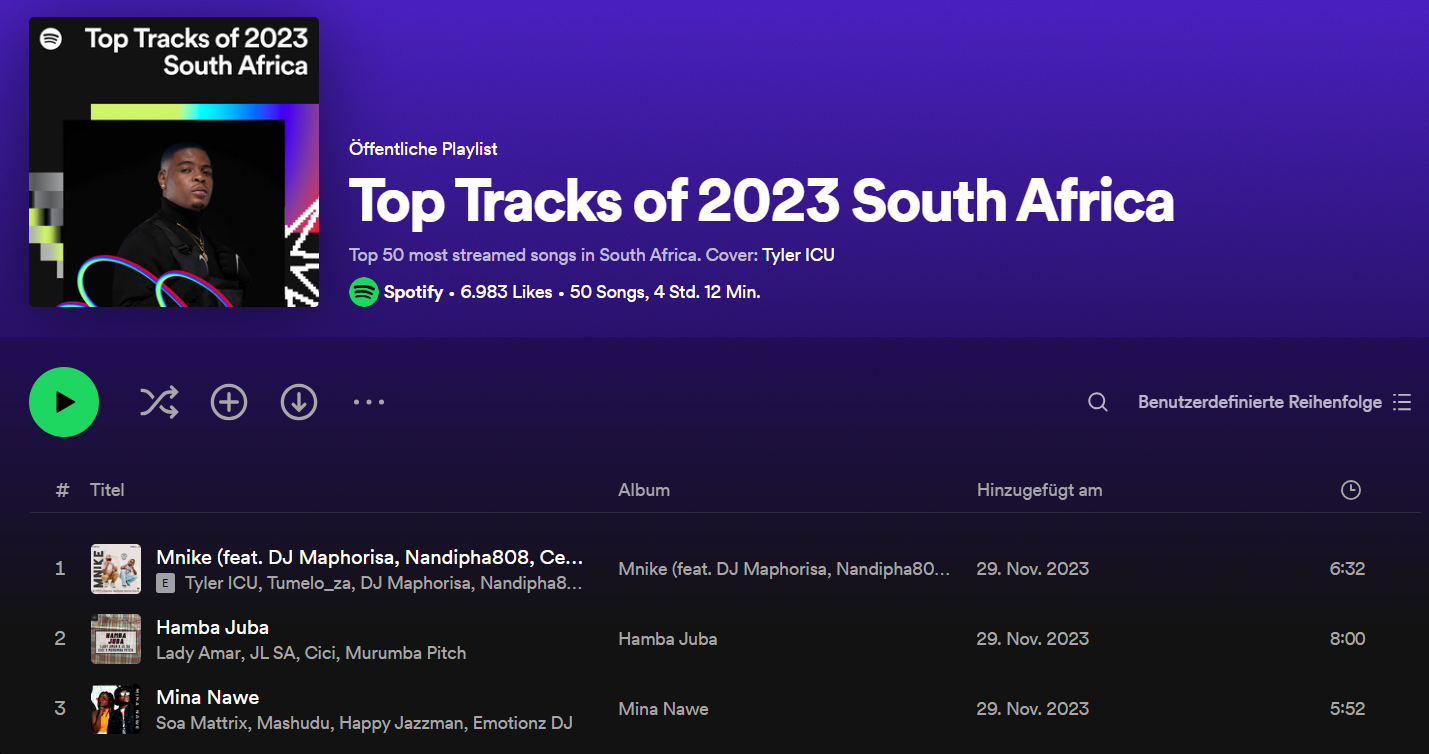

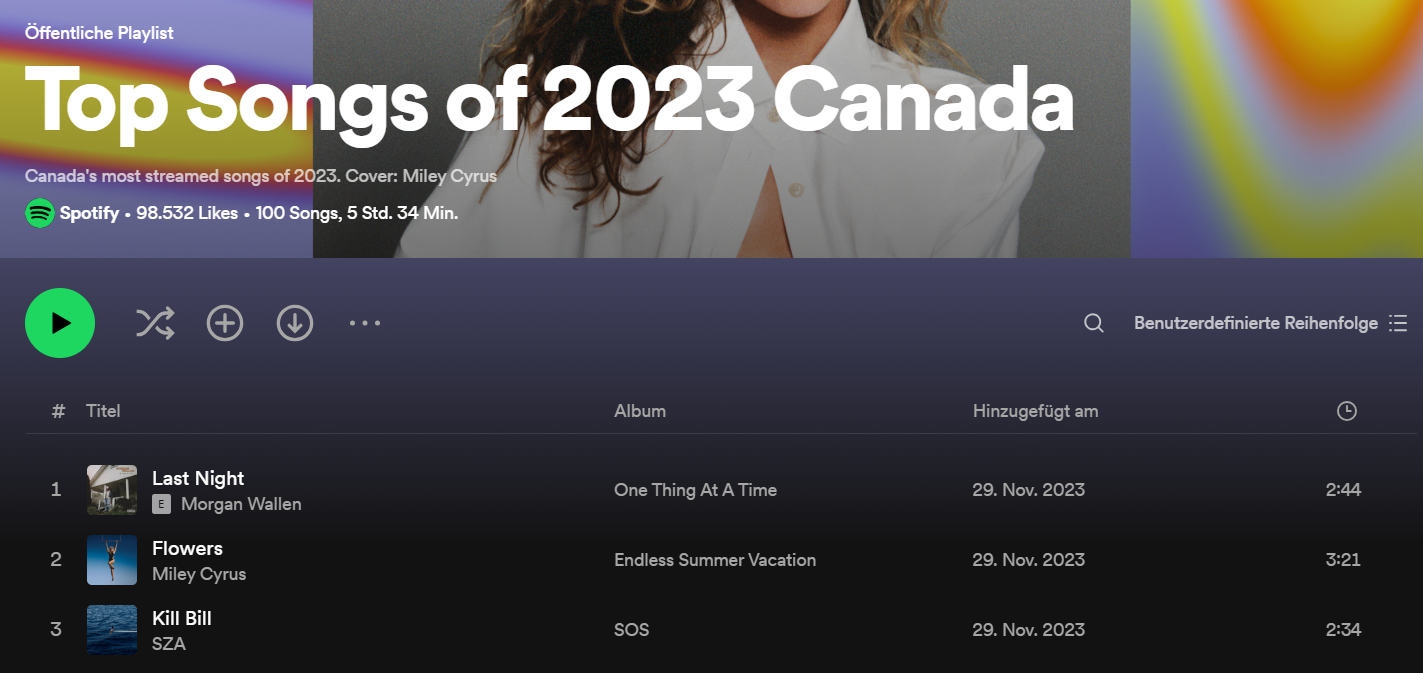

In [188]:
from IPython.core.display import Image

# Load the screenshots as png files from all five playlists

screenshot_uk = Image(filename="images/Screenshot_uk_playlist.png")
screenshot_pe = Image(filename="images/Screenshot_pe_playlist.png")
screenshot_jp = Image(filename="images/Screenshot_jp_playlist.png")
screenshot_au = Image(filename="images/Screenshot_au_playlist.png")
screenshot_za = Image(filename="images/Screenshot_za_playlist.png")
screenshot_ca = Image(filename="images/Screenshot_ca_playlist.png")

# To display the image
display(screenshot_uk)
display(screenshot_pe)
display(screenshot_jp)
display(screenshot_au)
display(screenshot_za)
display(screenshot_ca)

## 2. Data Exploration, Retrieval, and Cleaning <a id="section2"></a>

### 2-1. Importing libraries and modules and authenticating with Spotify API credentials <a id="section2-1"></a>

In [189]:
# Import libraries and packages for all analysis
# Install wordcloud package if not already installed
import os
import pandas as pd
import spotipy
import datetime
import sys
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import plotly.graph_objects as go
from spotipy.oauth2 import SpotifyOAuth
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
from scipy.stats import chi2_contingency

import requests
import pickle
from bs4 import BeautifulSoup
from dotenv import load_dotenv
import statistics

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve, average_precision_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Importing self-written functions below
import modules.data_collection_functions as dcf


# Load environment variables
load_dotenv(".env")

True

**Notebook Instructions** 

All cells in this notebook can be run to show the aimed for results. These will be static, unless run on a local machine.

Modules needed to be installed by the command line are:

Plotly (pip install plotly==4.5.0 or conda install -c plotly plotly=4.5.0)
WordCloud (pip install wordcloud or conda install -c conda-forge wordcloud)*

All self-written functions are stored in the folder "modules" in the file "data_collection_functions.py".

Due to Spotify API limitations, we have deconstructed the project into several CSV save points, from which we re-import the created dataframe. Hashed out code is left in the file to show process and working for Spotify API calls, though isn't needed to run to see visualisations and results. 

In [190]:
# Set up Spotify API credentials
my_id = os.getenv("SPOTIPY_CLIENT_ID")
my_secret = os.environ.get("SPOTIPY_CLIENT_SECRET")
redirect_uri = os.environ.get("SPOTIPY_REDIRECT_URI")

In [191]:
# Set up scope
scope = "user-library-read user-read-recently-played"
# Set up Spotify API object
sp = spotipy.Spotify(
    auth_manager=SpotifyOAuth(
        client_id=my_id,
        client_secret=my_secret,
        scope=scope,
        # redirect_uri="http://localhost/3000",
    )
)

### 2-2 Scraping Playlist Data from the Spotify API

In [192]:
# The code below was used to get the playlists for each country from the Spotify API.
# Due to API restrictions of Spotify, the retrieved playlists
# are now saved as csv files in the data folder.
# Get the playlists "Top Artists of 2023" for each country
top_uk = sp.playlist_items("https://open.spotify.com/playlist/37i9dQZF1DWX9sh5c3DUg5?si=233a058de2574248")
top_jp = sp.playlist_items("https://open.spotify.com/playlist/37i9dQZF1DWVGT2JSyiZCf?si=daf2e42e18a5454c")
top_pe = sp.playlist_items("https://open.spotify.com/playlist/37i9dQZF1DWYDAFSs0pSIy?si=d2653b4ac4cb4568")
top_au = sp.playlist_items("https://open.spotify.com/playlist/37i9dQZF1DWXfIydoEnyUS?si=3d27d4798d8748b1")
top_za = sp.playlist_items("https://open.spotify.com/playlist/37i9dQZF1DXbE0Ss55ztHK?si=82f7418fdb6a40f9")
top_ca = sp.playlist_items("https://open.spotify.com/playlist/37i9dQZF1DXdZ9O7tD0YEX?si=43fb353da96145c5")

### 2-3. Obtaining the artist data <a id="section2-3"></a>

The initial 6 playlists include 50 songs each. Some songs and some artists appear on more than one playliss, indicating their popularity. Wee are using the self-defined function get_playlist. The below code is hashed as it is working from calling the Spotify API, the artist details are visible in top_artists.


#### 2-3-1. Getting all artists from top playlists <a id="section2-3-1"></a> 

In [193]:
# Playlists come in dictionaries, store dictionary in dataframe, display head
top_uk_df = pd.DataFrame(top_uk)
display(top_uk_df.head())

The first level dictionary of the scraped playlists show api data of tracks in the playlist, e.g. api link, number of tracks.

In [194]:
# Display "items" dictionary of "top_uk_df"
top_uk_items = pd.DataFrame(top_uk["items"])
display(top_uk_items.head())

The second-level dictionary shows meta data of tracks in the playlist, e.g. when added, added_by, etc. We can see that the main information about the playlists' tracks are stored in the sub-level dictionary "track".

In [195]:
# For all countries, create a concatenated representation of the playlist "Top Artists of 2023" with artist id
top_UK_playlist = dcf.get_playlist(top_uk, "GB")
top_JP_playlist = dcf.get_playlist(top_jp, "JP")
top_PE_playlist = dcf.get_playlist(top_pe, "PE")
top_AU_playlist = dcf.get_playlist(top_au, "AU")
top_ZA_playlist = dcf.get_playlist(top_za, "ZA")
top_CA_playlist = dcf.get_playlist(top_ca, "CA")
# Create a dataframe of all the playlists by concetanating the dataframes of each country
top_artists = pd.concat([top_UK_playlist, top_JP_playlist, top_PE_playlist, top_AU_playlist, top_ZA_playlist, top_CA_playlist])
# Display head of dataframe
display(top_artists.head())

In [196]:
# Write top_artists to csv file

top_artists.to_csv("top_artists.csv")

In [197]:
# Open csv file as a dataframe
top_artists = pd.read_csv("data/Final Data/top_artists.csv")

In [198]:
# Data cleaning: drop unnecessary columns and rename unnamed column
top_artists.drop(columns=["playlist_song"], inplace=True)
top_artists.rename(columns={"Unnamed: 0": "playlist_position"}, inplace=True)

In [199]:
# Increasing the playlist position by 1 to range from 1-50, instead of 0-49
top_artists["playlist_position"] = top_artists["playlist_position"] + 1

The songs shown on the original playlists are not used in further analysis due to the lack of clarity of what how songs were chosen in each top playlist.

In [200]:
# # Display head of dataframe
display(top_artists.head())

playlist_position     artist_name               artist_id country  \
0                  1    Taylor Swift  06HL4z0CvFAxyc27GXpf02      GB   
1                  2           Drake  3TVXtAsR1Inumwj472S9r4      GB   
2                  3      The Weeknd  1Xyo4u8uXC1ZmMpatF05PJ      GB   
3                  4  Arctic Monkeys  7Ln80lUS6He07XvHI8qqHH      GB   
4                  5      Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V      GB   

                              artist_uri  
0  spotify:artist:06HL4z0CvFAxyc27GXpf02  
1  spotify:artist:3TVXtAsR1Inumwj472S9r4  
2  spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ  
3  spotify:artist:7Ln80lUS6He07XvHI8qqHH  
4  spotify:artist:6eUKZXaKkcviH0Ku9w2n3V

#### 2-3-2. Wiki Scraping Artist Origin and Birthplaces <a id="section2-3-2"></a>

We are scraping artists' origin and birthplaces from Wikipedia to later combine this information with song features, popularity and other traits to answer our research question exploring features that currently popular music and artists have. Individual artists tend to have birthplace information and sometimes origin information, while groups and bands tend to have origin information - this is later consolidated into a singular location column.

For the scraping, we created two functions (fetch_artist_info and multi_artist_scrape) that iteratively build on another to scrape the information necessary (these, along with other functions can be seen in /modules/data_collection_functions). There is missing or incorrect information for several of the artists, identified through a further missing_info function.

In [201]:
# Splitting imported artists into lists for each country
artist_name_list = top_artists["artist_name"].tolist(
uk_artist_name_list = artist_name_list[:50]
jp_artist_name_list = artist_name_list[50:100]
pe_artist_name_list = artist_name_list[100:150]
au_artist_name_list = artist_name_list[150:200]
za_artist_name_list = artist_name_list[200:250]
ca_artist_name_list = artist_name_list[250:
print(f"There are {len(uk_artist_name_list)} artists in each playlist.")

In [202]:
# Fetching Birth and Origin Place of artists from each country's playlist
# Code calling the WikiScrape functions, "False" to not save scraped information as a csv-file
# Code will take a while to run, as it is scraping information from 300 artists (maximum 10 minutes, approximately 4 minutes)
pe_artist_place = dcf.multi_artist_scrape(pe_artist_name_list, 'PE', False)
au_artist_place = dcf.multi_artist_scrape(au_artist_name_list, 'AU', False)
za_artist_place = dcf.multi_artist_scrape(za_artist_name_list, 'ZA', False)
ca_artist_place = dcf.multi_artist_scrape(ca_artist_name_list, 'CA', False)
uk_artist_place = dcf.multi_artist_scrape(uk_artist_name_list, 'UK', False)
# Running jp_code led to changes in alternate options, added band, South Korean group, and singer-songwriter
jp_artist_place = dcf.multi_artist_scrape(jp_artist_name_list, 'JP', False)

In [203]:
#Renaming/resetting columns/indexes:
pe_artist_place = pe_artist_place.reset_index()
pe_artist_place.columns.values[0:5] =["rank","artist_name", "born", "origin", "country_code"]
# display(pe_artist_place.head())
#Renaming and resetting index/columns:
au_artist_place = au_artist_place.reset_index()
au_artist_place.columns.values[0:5] =["rank","artist_name", "born", "origin", "country_code"]
# display(au_artist_place.head())
#Renaming and resetting index/columns:
za_artist_place = za_artist_place.reset_index()
za_artist_place.columns.values[0:5] =["rank","artist_name", "born", "origin", "country_code"]
# display(za_artist_place.head())
#Renaming and resetting index/columns:
ca_artist_place = ca_artist_place.reset_index()
ca_artist_place.columns.values[0:5] =["rank","artist_name", "born", "origin", "country_code"]
# display(ca_artist_place.head())
#Renaming and resetting index/columns:
jp_artist_place = jp_artist_place.reset_index()
jp_artist_place.columns.values[0:5] =["rank","artist_name", "born", "origin", "country_code"]
# display(jp_artist_place.head())x
#Renaming and resetting index/columns:
uk_artist_place = uk_artist_place.reset_index()
uk_artist_place.columns.values[0:5] =["rank","artist_name", "born", "origin", "country_code"]
# display(uk_artist_place.head())
# Concatenating all the dfs into one
frames = [uk_artist_place, jp_artist_place, pe_artist_place, au_artist_place, za_artist_place, ca_artist_place]
final_places_df = pd.concat(frames)

display(final_places_df.head())

**Cleaning Scraped Wikipedia Data** 

The functions do not result in perfect ouput, leaving floating ']' or leaving numeric citations or simply lacking information. While some was easily fixed by specifying code using regex, some corrections were done manually for simplicity. 

In [204]:
# Saving as variable to return to later
first_incorrect = dcf.missing_info(final_places_df)
# print(first_incorrect)
# 3 steps: remove floating ], remove floating [digit]s, and change Nan to empty string
# 1. Using regex to isolate floating ] and [digit]s
reg_pat1 = r'\]'
reg_pat2 = r'\[\d+\](?=\[\d+\])*'
# 2. Using regex to replace floating ] and [digit]s with empty string
final_places_df['born'] = final_places_df['born'].str.replace(reg_pat2, '', regex = True)
final_places_df['origin'] = final_places_df['origin'].str.replace(reg_pat2, '', regex = True)
final_places_df['born'] = final_places_df['born'].str.replace(reg_pat1, '', regex = True)
#3. Using .fillna  to change Nan to empty string
final_places_df = final_places_df.fillna('')
#Checking where the first incorrect values are in the original spreadsheet
for x in first_incorrect:
   display(final_places_df[final_places_df['artist_name'].isin(x)])

In [205]:
#Manual changes that aren't fixed by regex:
#Correcting above smaller mistakes
final_places_df.loc[final_places_df['artist_name'] == 'Fujii Kaze', 'born'] = 'Satoshō, Okayama, Japan'
final_places_df.loc[final_places_df['artist_name'] == 'Feid', 'born'] = 'Medellín, Colombia'
final_places_df.loc[final_places_df['artist_name'] == 'Marshmello', 'born'] = 'Philadelphia, Pennsylvania, U.S.'
final_places_df.loc[final_places_df['artist_name'] == 'Marshmello duplicate', 'born'] = 'Philadelphia, Pennsylvania, U.S.'
final_places_df.loc[final_places_df['artist_name'] == 'Jhayco', 'born'] = 'Río Piedras, San Juan, Puerto Rico'
final_places_df.loc[final_places_df['artist_name'] == 'Luke Combs', 'born'] = 'Huntersville, North Carolina, U.S.'
final_places_df.loc[final_places_df['artist_name'] == 'Lil Durk', 'born'] = 'Chicago, Illinois, U.S.'
final_places_df.loc[final_places_df['artist_name'] == 'Mrs. GREEN APPLE', 'origin'] = 'Tokyo, Japan'
final_places_df.loc[final_places_df['artist_name'] == 'OFFICIAL HIGE DANDISM', 'origin'] = 'Shimane, Japan'
final_places_df.loc[final_places_df['artist_name'] == 'SEVENTEEN', 'origin'] = 'Seoul, South Korea.'
final_places_df.loc[final_places_df['artist_name'] == 'SOUTHERN ALL STARS', 'origin'] = 'Kanagawa, Japan'
final_places_df.loc[final_places_df['artist_name'] == 'BE:FIRST', 'origin'] = 'Japan'
final_places_df.loc[final_places_df['artist_name'] == 'DREAMS COME TRUE', 'origin'] = 'Japan'
final_places_df.loc[final_places_df['artist_name'] == 'KAROL G', 'born'] = 'Medellín, Antioquia, Colombia'
final_places_df.loc[final_places_df['artist_name'] == 'KAROL G duplicate', 'born'] = 'Medellín, Antioquia, Colombia'
final_places_df.loc[final_places_df['artist_name'] == 'Tyler ICU', 'born'] = 'Tembisa, Gauteng, South Africa'

#change duplicate to empty string
final_places_df.loc[final_places_df['artist_name'] == 'Marshmello duplicate', 'artist_name'] = 'Marshmello'
final_places_df.loc[final_places_df['artist_name'] == 'KAROL G duplicate', 'artist_name'] = 'KAROL G'

In [206]:
# Create a csv file of the final dataframe
final_places_df.to_csv("data/Final Data/final_places.csv")

In [207]:
# Import the final places dataframe
final_places_df = pd.read_csv("data/Final Data/final_places.csv")

In [208]:
display(final_places_df.head())

Unnamed: 0  rank     artist_name                             born  \
0           0     0    Taylor Swift   West Reading, Pennsylvania, US   
1           1     1           Drake          Toronto,Ontario, Canada   
2           2     2      The Weeknd          Toronto,Ontario, Canada   
3           3     3  Arctic Monkeys                              NaN   
4           4     4      Ed Sheeran  Halifax,West Yorkshire, England   

                     origin country_code  
0  Nashville, Tennessee, US           UK  
1                       NaN           UK  
2                       NaN           UK  
3        Sheffield, England           UK  
4                       NaN           UK

**Consolidation:** Throughout the process, we are building up to the final full datasets, here we add origin and birthplace information to the overall artist spreadsheet.

In [209]:
# Merging top artists
# Iterate through rows in uk_info DataFrame
for index, row in final_places_df.iterrows():
    # Find the corresponding row in artist_spreadsheet_df based on artist_name
    matching_row = top_artists.loc[top_artists["artist_name"] == row["artist_name"]]
    # Assign values from uk_info to artist_spreadsheet_df columns
    top_artists.loc[matching_row.index, "origin"] = row["origin"]
    top_artists.loc[matching_row.index, "born"] = row["born"]

In [210]:
# Condense the "birthplace" and "origin" columns into "location" column
top_artists['location'] = top_artists['origin'].combine_first(top_artists['born'])
#Dropping the born and origin columns
top_artists.drop(columns=["born", "origin"], inplace=True)
#moving location column to position 6
col_name="location"
first_col = top_artists.pop(col_name)
top_artists.insert(5, col_name, first_col)


In [211]:
display(top_artists.head())

playlist_position     artist_name               artist_id country  \
0                  1    Taylor Swift  06HL4z0CvFAxyc27GXpf02      GB   
1                  2           Drake  3TVXtAsR1Inumwj472S9r4      GB   
2                  3      The Weeknd  1Xyo4u8uXC1ZmMpatF05PJ      GB   
3                  4  Arctic Monkeys  7Ln80lUS6He07XvHI8qqHH      GB   
4                  5      Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V      GB   

                              artist_uri  
0  spotify:artist:06HL4z0CvFAxyc27GXpf02  
1  spotify:artist:3TVXtAsR1Inumwj472S9r4  
2  spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ  
3  spotify:artist:7Ln80lUS6He07XvHI8qqHH  
4  spotify:artist:6eUKZXaKkcviH0Ku9w2n3V

#### 2-3-3. Getting Artist Genres <a id="section2-3-3"></a>

The Spotify API returns a range of genres for each artist when retrieved. These range from generic (pop) to ultra-niche (permanent wave). The analysis of the genres widens our database to help us answer our research question. To do this, we created the get_genre and split_data function.

In [212]:
# Split dataframe into 6 dataframes
split_df = dcf.split_dataframe(top_artists)

In [213]:
# Create a genre
genre_df1 = dcf.get_genre(split_df[0])
genre_df2 = dcf.get_genre(split_df[1])
genre_df3 = dcf.get_genre(split_df[2])
genre_df4 = dcf.get_genre(split_df[3])
genre_df5 = dcf.get_genre(split_df[4])
genre_df6 = dcf.get_genre(split_df[5])

# Merge six dataframes into one
genre_df = pd.concat([genre_df1, genre_df2, genre_df3, genre_df4, genre_df5, genre_df6])

**Consolidation of whole artist dataframe with genre information**

In [214]:
# Consolidation of genre and artist dataframes
for index, row in genre_df.iterrows():
    # Find the corresponding row in artist_spreadsheet_df based on artist_name
    matching_row = top_artists.loc[top_artists['artist_id'] == row['artist_id']]
    # Assign values from uk_info to artist_spreadsheet_df columns
    top_artists.loc[matching_row.index, 'artist_genre1'] = row['artist_genre1']
    top_artists.loc[matching_row.index, 'artist_genre2'] = row['artist_genre2']
    top_artists.loc[matching_row.index, 'artist_genre3'] = row['artist_genre3']

In [215]:
# Save the dataframe as a csv file
top_artists.to_csv("data/Final Data/top_artists_genre.csv")

In [216]:
#Import top_artists_genre.csv
top_artists_genre = pd.read_csv("data/Final Data/top_artists_genre.csv")

In [217]:
#Drop the first column
top_artists_genre.drop(columns=["Unnamed: 0"], inplace=True)

In [218]:
display(top_artists_genre.head())

playlist_position     artist_name               artist_id country  \
0                  1    Taylor Swift  06HL4z0CvFAxyc27GXpf02      GB   
1                  2           Drake  3TVXtAsR1Inumwj472S9r4      GB   
2                  3      The Weeknd  1Xyo4u8uXC1ZmMpatF05PJ      GB   
3                  4  Arctic Monkeys  7Ln80lUS6He07XvHI8qqHH      GB   
4                  5      Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V      GB   

                              artist_uri                         location  \
0  spotify:artist:06HL4z0CvFAxyc27GXpf02         Nashville, Tennessee, US   
1  spotify:artist:3TVXtAsR1Inumwj472S9r4          Toronto,Ontario, Canada   
2  spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ          Toronto,Ontario, Canada   
3  spotify:artist:7Ln80lUS6He07XvHI8qqHH               Sheffield, England   
4  spotify:artist:6eUKZXaKkcviH0Ku9w2n3V  Halifax,West Yorkshire, England   

               artist_genre1          artist_genre2   artist_genre3  
0                        pop                    NaN             NaN  
1           canadian hip hop           canadian pop         hip hop  
2  canadian contemporary r&b           canadian pop             pop  
3                garage rock            modern rock  permanent wave  
4                        pop  singer-songwriter pop          uk pop

### 2-4. Obtaining Song Data <a id="section2-4"></a>

For each of the top artists, we scraped the Spotify API to obtain the top 3 songs of each artist. The top songs per artist differ per country (i.e Taylor Swift's top songs are different in Peru than in Canada). As such, we have scraped top song information based on what playlist the artist is in. This initial information includes their numeric popularity, release date, their title and ID. Though the songs are from the top artists of 2023, they include songs from before this. We used the self-defined function get_top_songs.

#### 2-4-1. Getting Artists' Top Songs and their Popularity <a id="section2-4-1"></a>

The below code pulls from the Spotify API, its information is shown below in the top_songs_df.

In [219]:
# Import the csv file as a dataframe
top_songs_df = pd.read_csv("data/Final Data/top_songs.csv")

In [220]:
# For each artist in top_artists, get their top 3 songs and store them in a dictionary

top_songs_dic = {}
for index, row in top_artists_genre.iterrows():
    # Make a request for each artist in the list of top artists and save
    # their top tracks in a dictionary with the artist name as key
    artist_name = row["artist_name"]
    artist_uri = str(row["artist_uri"])
    country_ID = row["country"]
    top_songs_dic[artist_name] = dcf.get_top_songs(artist_uri, country_ID)

In [221]:
#Convert the top_songs_dic into a pandas series to extract the lists
# which are the values to each key
top_songs_series = pd.concat({k: pd.Series(v) for k, v in top_songs_dic.items()})
#Save the index of the series for later dataframe index
index_series = top_songs_series.index
#Convert the series into a dataframe and then separate the lists in the column "songs" into new columns,
# so that song name, song id, and other song information is separated in different columns
top_songs_df_tight = top_songs_series.to_frame(name="songs")
#display(top_songs_df)
# Convert the series into a dataframe and then separate the lists in the column "songs" into new columns
top_songs_df = pd.DataFrame(
    top_songs_df_tight["songs"].to_list(),
    index = index_series,
    columns= ["song_name", "song_id", "release_date", "release_date_precision", "popularity"]
    )
#Reset the index of the dataframe to and save the resulting columns "level_0" as "artist"
# and drop the resulting column "level_1"
top_songs_df = top_songs_df.reset_index()
top_songs_df = top_songs_df.rename(columns={"level_0": "artist"})
top_songs_df = top_songs_df.drop("level_1", axis= 1)

**Data Cleaning** Rows with value "year" for "release_date_precision" are not concise enough for our analysis, so are removed. This includes 7 songs. 

In [222]:
# Check values for release_date_precision

print(top_songs_df["release_date_precision"].unique())
print(top_songs_df["release_date_precision"].value_counts())

['day' 'year']
release_date_precision
day     542
year      7
Name: count, dtype: int64


In [223]:
# display songs with release_date_precision = "year"
year_precise = top_songs_df[top_songs_df["release_date_precision"] == "year"]

# Make year precise song_ids into a list
year_precise_ids = year_precise["song_id"].tolist()
print(year_precise_ids)

['3FSPaBp49Clqq2p4zc9dbA', '74tLlkN3rgVzRqQJgPfink', '7ygpwy2qP3NbrxVkHvUhXY', '12dU3vAh6AFoJkisorfoUl', '1ihCiJaXRl4f6Sy4LJov5z', '0sVnyL71jTOuMt9TZ59bws', '2JzZzZUQj3Qff7wapcbKjc']


In [224]:
# # Drop rows with value "year" in "release_date_precision" column

top_songs_df = top_songs_df[top_songs_df["release_date_precision"] != "year"]
print(top_songs_df["release_date_precision"].value_counts())

# Drop "release_date_precision" column, as it is no longer needed

top_songs_df.drop("release_date_precision", axis=1, inplace=True)

release_date_precision
day    542
Name: count, dtype: int64


In [225]:
# Save the dataframe as a csv file
top_songs_df.to_csv("data/Final Data/top_songs.csv")

In [226]:
display(top_songs_df)

Unnamed: 0        artist  \
0             0  Taylor Swift   
1             1  Taylor Swift   
2             2  Taylor Swift   
3             3         Drake   
4             4         Drake   
..          ...           ...   
544         544        Polo G   
545         545        Polo G   
546         546     Pop Smoke   
547         547     Pop Smoke   
548         548     Pop Smoke   

                                             song_name  \
0                                         Cruel Summer   
1    Is It Over Now? (Taylor's Version) (From The V...   
2                                            Anti-Hero   
3                                   IDGAF (feat. Yeat)   
4              Rich Baby Daddy (feat. Sexyy Red & SZA)   
..                                                 ...   
544                                            RAPSTAR   
545                           Pop Out (feat. Lil Tjay)   
546                                               Dior   
547                            What You Know Bout Love   
548            For The Night (feat. Lil Baby & DaBaby)   

                    song_id release_date  popularity  
0    1BxfuPKGuaTgP7aM0Bbdwr   2019-08-23          99  
1    1Iq8oo9XkmmvCQiGOfORiz   2023-10-26          93  
2    0V3wPSX9ygBnCm8psDIegu   2022-10-21          92  
3    2YSzYUF3jWqb9YP9VXmpjE   2023-10-06          92  
4    1yeB8MUNeLo9Ek1UEpsyz6   2023-10-06          92  
..                      ...          ...         ...  
544  18vXApRmJSgQ6wG2ll9AOg   2021-06-11          81  
545  6uFn47ACjqYkc0jADwEdj1   2019-06-07          80  
546  79s5XnCN4TJKTVMSmOx8Ep   2019-07-26          83  
547  1tkg4EHVoqnhR6iFEXb60y   2020-07-03          82  
548  0PvFJmanyNQMseIFrU708S   2020-07-03          80  

[542 rows x 6 columns]

#### 2-4-2. Getting Song Features <a id="section2-4-2"></a>

The Spotify API collects features for each song - some are exact (song duration, or tempo); others are interpreted (valence or happiness, energy, acousticness). Adding song features allows for a multi-faceted analysis later on. The code below retrieves from the API, so is hashed out - features_df at the end of this block shows the data.

In [227]:
# Get track ids from top_songs_df
track_ids = top_songs_df["song_id"].tolist()
print(track_ids[:10])

['1BxfuPKGuaTgP7aM0Bbdwr', '1Iq8oo9XkmmvCQiGOfORiz', '0V3wPSX9ygBnCm8psDIegu', '2YSzYUF3jWqb9YP9VXmpjE', '1yeB8MUNeLo9Ek1UEpsyz6', '7aqfrAY2p9BUSiupwk3svU', '7CyPwkp0oE8Ro9Dd5CUDjW', '6WzRpISELf3YglGAh7TXcG', '7MXVkk9YMctZqd1Srtv4MB', '5XeFesFbtLpXzIVDNQP22n']


In [228]:
# Get track names and song features (Limitation 500 calls)
song_features_dict = {}
song_titles_dict = {}
for song in track_ids:
    song_features_dict[song] = [sp.audio_features(song)]
    song_titles_dict[song] = [sp.track(song)["name"]]
print(song_features_dict)
print(song_titles_dict)

In [229]:
# Running the function on the pulled
dcf.break_into_dicts(song_features_dict)

In [230]:
# Create dataframe
song_features_df_2 = pd.DataFrame.from_dict(BreakIntoDicts(song_features_dict), orient="index")
display(song_features_df_2.head())

In [231]:
#Add song titles
song_titles_df = pd.DataFrame.from_dict(song_titles_dict, orient="index")
#merge dataframes
features_df = pd.merge(song_features_df_2, song_titles_df, left_index=True, right_index=True)
#change column title for '0'\
features_df.rename(columns={0: "Song Title"}, inplace=True)
#reorder columns
features_df = features_df[["Song Title", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature"]]

In [232]:
# export to csv
features_df.to_csv("features_df.csv", index=True)

In [233]:
#Import features_df
features_df = pd.read_csv("data/Final Data/features_df.csv")

In [234]:
# Merge top_songs_df and features_df into the main song dataframe
top_songs_features_df = pd.merge(top_songs_df, features_df, on="song_id", how="left")

In [235]:
display(top_songs_features_df.head())

Unnamed: 0        artist  \
0           0  Taylor Swift   
1           1  Taylor Swift   
2           2  Taylor Swift   
3           3         Drake   
4           4         Drake   

                                           song_name                 song_id  \
0                                       Cruel Summer  1BxfuPKGuaTgP7aM0Bbdwr   
1  Is It Over Now? (Taylor's Version) (From The V...  1Iq8oo9XkmmvCQiGOfORiz   
2                                          Anti-Hero  0V3wPSX9ygBnCm8psDIegu   
3                                 IDGAF (feat. Yeat)  2YSzYUF3jWqb9YP9VXmpjE   
4            Rich Baby Daddy (feat. Sexyy Red & SZA)  1yeB8MUNeLo9Ek1UEpsyz6   

  release_date  popularity                                         Song Title  \
0   2019-08-23          99                                       Cruel Summer   
1   2023-10-26          93  Is It Over Now? (Taylor's Version) (From The V...   
2   2022-10-21          92                                          Anti-Hero   
3   2023-10-06          92                                 IDGAF (feat. Yeat)   
4   2023-10-06          92            Rich Baby Daddy (feat. Sexyy Red & SZA)   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.552   0.702  9.0    -5.707   1.0       0.1570        0.1170   
1         0.596   0.658  0.0    -7.346   1.0       0.0360        0.0504   
2         0.637   0.643  4.0    -6.571   1.0       0.0519        0.1300   
3         0.663   0.670  8.0    -8.399   1.0       0.2710        0.0464   
4         0.645   0.729  2.0    -4.560   1.0       0.0528        0.0377   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  
0          0.000021     0.105    0.564  169.994     178427.0             4.0  
1          0.000000     0.127    0.176  100.012     229478.0             4.0  
2          0.000002     0.142    0.533   97.008     200690.0             4.0  
3          0.000089     0.205    0.138  136.952     260111.0             4.0  
4          0.000000     0.384    0.142  146.010     319192.0             4.0

### 2-5. Data Aggregation <a id="section2-5"></a>

We have now two final CSV files - top_artist_genre and top_song_features_df, both stored in the folder "Final data". They are normalised as each row shows one observation either being an artist or a song, and they are related by their primary keys song_id and artist_id. Some final touches of data cleaning are needed.

**Final Data Cleaning** 

In [236]:
# Check top_songs_features_df for any null values
top_songs_features_df.isnull().sum()
# List out which rows have null values
top_songs_features_df[top_songs_features_df.isnull().any(axis=1)]

# Making a list of song_ids with null values
null_song_ids = top_songs_features_df[top_songs_features_df.isnull().any(axis=1)][
    "song_id"
].tolist()
print(null_song_ids[:5])

['2kQ9udZ0v3H8PFSVmbY1Kq', '52eIcoLUM25zbQupAZYoFh', '6VObnIkLVruX4UVyxWhlqm', '7gaA3wERFkFkgivjwbSvkG', '6x9pCndnXEoea0CMcfjs9W']


In [237]:
# Change column name in top_songs_features_df from artist to artist_name

top_songs_features_df.rename(columns={"artist": "artist_name"}, inplace=True)

In [238]:
# Adding artist id to top_songs_features_df from top_artists_genre

for index, row in top_artists_genre.iterrows():
    # Find the corresponding row in artist_spreadsheet_df based on artist_name
    matching_row = top_songs_features_df.loc[
        top_songs_features_df["artist_name"] == row["artist_name"]
    ]

    # Assign values from uk_info to artist_spreadsheet_df columns
    top_songs_features_df.loc[matching_row.index, "artist_id"] = row["artist_id"]

In [239]:
# Drop song title column
top_songs_features_df.drop(columns=["Song Title"], inplace=True)

# Move artist_id column to position 3
col_name = "artist_id"
first_col = top_songs_features_df.pop(col_name)
top_songs_features_df.insert(2, col_name, first_col)

In [240]:
# Drop unnamed column
top_songs_features_df.drop(columns=["Unnamed: 0"], inplace=True)

In [241]:
# Move song_id column to position 0
col_name = "song_id"
first_col = top_songs_features_df.pop(col_name)
top_songs_features_df.insert(0, col_name, first_col)

In [242]:
# Move song_name to position 1
col_name = "song_name"
first_col = top_songs_features_df.pop(col_name)
top_songs_features_df.insert(1, col_name, first_col)

In [243]:
# Adding song code information to top_songs_features_df - this allows for a deeper analysis of popularity of songs through their ranking - aa is the artist's top song, bb is the artist's second top song, and cc is the artist's 3rd top song

# add a column called song_code
top_songs_features_df["song_code"] = ""

# Create a list of values 'aa', 'bb', and 'cc' repeated throughout
values = ["aa", "bb", "cc"] * (len(top_songs_features_df) // 3) + ["aa", "bb", "cc"][
    : len(top_songs_features_df) % 3
]

# Fill the 'column_name' with the values
top_songs_features_df["song_code"] = top_songs_features_df.index.map(
    lambda x: values[x % len(values)]
)

In [244]:
# Drop lines with missing year values

# Remove rows where song_id is in year_precise_ids
top_songs_features_df = top_songs_features_df[
    ~top_songs_features_df["song_id"].isin(year_precise_ids)
]

In [245]:
# Export top_songs_features_df as csv
top_songs_features_df.to_csv("data/Final Data/top_songs_features.csv", index=False)

In [246]:
# Importing top_songs_features_df
top_songs_features = pd.read_csv("data/Final Data/top_songs_features.csv")

In [247]:
# Display final two dataframes

display(top_songs_features.head())
display(top_artists_genre.head())

song_id                                          song_name  \
0  1BxfuPKGuaTgP7aM0Bbdwr                                       Cruel Summer   
1  1Iq8oo9XkmmvCQiGOfORiz  Is It Over Now? (Taylor's Version) (From The V...   
2  0V3wPSX9ygBnCm8psDIegu                                          Anti-Hero   
3  2YSzYUF3jWqb9YP9VXmpjE                                 IDGAF (feat. Yeat)   
4  1yeB8MUNeLo9Ek1UEpsyz6            Rich Baby Daddy (feat. Sexyy Red & SZA)   

    artist_name               artist_id release_date  popularity  \
0  Taylor Swift  06HL4z0CvFAxyc27GXpf02   2019-08-23          99   
1  Taylor Swift  06HL4z0CvFAxyc27GXpf02   2023-10-26          93   
2  Taylor Swift  06HL4z0CvFAxyc27GXpf02   2022-10-21          92   
3         Drake  3TVXtAsR1Inumwj472S9r4   2023-10-06          92   
4         Drake  3TVXtAsR1Inumwj472S9r4   2023-10-06          92   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.552   0.702  9.0    -5.707   1.0       0.1570        0.1170   
1         0.596   0.658  0.0    -7.346   1.0       0.0360        0.0504   
2         0.637   0.643  4.0    -6.571   1.0       0.0519        0.1300   
3         0.663   0.670  8.0    -8.399   1.0       0.2710        0.0464   
4         0.645   0.729  2.0    -4.560   1.0       0.0528        0.0377   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.000021     0.105    0.564  169.994     178427.0             4.0   
1          0.000000     0.127    0.176  100.012     229478.0             4.0   
2          0.000002     0.142    0.533   97.008     200690.0             4.0   
3          0.000089     0.205    0.138  136.952     260111.0             4.0   
4          0.000000     0.384    0.142  146.010     319192.0             4.0   

  song_code  
0        aa  
1        bb  
2        cc  
3        aa  
4        bb

playlist_position     artist_name               artist_id country  \
0                  1    Taylor Swift  06HL4z0CvFAxyc27GXpf02      GB   
1                  2           Drake  3TVXtAsR1Inumwj472S9r4      GB   
2                  3      The Weeknd  1Xyo4u8uXC1ZmMpatF05PJ      GB   
3                  4  Arctic Monkeys  7Ln80lUS6He07XvHI8qqHH      GB   
4                  5      Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V      GB   

                              artist_uri                         location  \
0  spotify:artist:06HL4z0CvFAxyc27GXpf02         Nashville, Tennessee, US   
1  spotify:artist:3TVXtAsR1Inumwj472S9r4          Toronto,Ontario, Canada   
2  spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ          Toronto,Ontario, Canada   
3  spotify:artist:7Ln80lUS6He07XvHI8qqHH               Sheffield, England   
4  spotify:artist:6eUKZXaKkcviH0Ku9w2n3V  Halifax,West Yorkshire, England   

               artist_genre1          artist_genre2   artist_genre3  
0                        pop                    NaN             NaN  
1           canadian hip hop           canadian pop         hip hop  
2  canadian contemporary r&b           canadian pop             pop  
3                garage rock            modern rock  permanent wave  
4                        pop  singer-songwriter pop          uk pop

### 2-6. Limitations of Data Collection Process <a id="section2-6"></a>

For this project, we could not find a database that adequately matched our needs. As such, we created our own from a range of sources. The key resource for this project is the Spotify API, which has limits on the amount of requests that are possible. The restrictions and rules of the API resulted in changes to the project. A key factor that impacted our database is the limitation of pulling song features - with a limit of 500 requests. Unfortunately, this meant that we were barred from requesting features for 35 of the songs (originall 42, however 7 were culled for lacking release date precision, shown below). While we have tried alternate approaches to requesting the information, ultimately we have been unable - as such, the below songs have been removed from our analysis.

In [248]:
# count how many missing values there are in the popularity column
print(
    f"There are {top_songs_features['danceability'].isnull().sum()} songs with missing feature values. Their titles are listed below:"
)

# List the song_names with missing features:
display(
    top_songs_features[top_songs_features.isnull().any(axis=1)]["song_name"].tolist()
)

There are 35 songs with missing feature values. Their titles are listed below:


['Darling',
 'redrum',
 'Skyfall',
 'yes, and?',
 'n.h.i.e.',
 'just like me',
 'Yesterday - Remastered 2009',
 "I'm Still Standing",
 'Another One Bites The Dust - Remastered 2011',
 'ケセラセラ',
 'アイラブユー',
 '晴る',
 'ばかまじめ',
 'Luces Tenues',
 'Pa Ti Estoy',
 'Young Miko: Bzrp Music Sessions, Vol. 58',
 'TQMQA',
 'El Amor de Mi Vida',
 'Por el Resto de Tu Vida',
 'Young Miko: Bzrp Music Sessions, Vol. 58',
 'Así Es el Amor',
 'Desesperados',
 'Una Foto Remix (feat. Emilia)',
 'Vida de Rico',
 'Una Foto Remix (feat. Emilia)',
 'Beautiful Crazy',
 'Heading South',
 'Stay With Me',
 'Said',
 'prove it',
 'Poison',
 'pop ur shit',
 'Hot (Remix) [feat. Gunna and Travis Scott]',
 'Just Wanna Rock',
 'dangerous']

## 3. Exploratatory Data Visualisation and Analysis <a id="section3"></a>

### 3-1 Summary Statistics and Single factor visualisation <a id="section3-1"></a>

Our final datasets are top_song_features and top_artist_genre. The former has 500 songs, and shows their title, song ID, artist name and ID, their release date, and their song features. Their song features involve 14 features which Spotify identifies: popularity, danceability, energy, key, mode, loudness, speechiness, acousticness, instrumentalness, valence, liveness, tempo, song duration and time signature. The songs were retrieved as the top 3 most popular song by an artist, which is also demonstrated in the dataset as "aa" for the Top Song, "bb" for the Second Top Song, and "cc" for the third top song.

Top_artist_genre contains the final artist information, including their name and ID, their musical origin or birthplace, their position on their respective playlists, and their top 3 genres. This contains 300 artists.

<table>
  <tr>
    <th>Feature</th>
    <th>Range/Unit</th> 
    <th>Description</th>
  </tr>
  <tr>
    <td>Popularity</td>
    <td>0 - 100</td> 
    <td>The higher the value, the more generally popular the song is.</td>
  </tr>
  <tr>
    <td>Danceability</td>
    <td>0.0-1.0</td> 
    <td>Higher values represent more rhythmic music.</td>
  </tr>
  <tr>
    <td>Energy</td>
    <td>0.0-1.0</td> 
    <td>Higher means more energetic</td>
  </tr>
  <tr>
    <td>Key</td>
    <td>-1 - 11</td> 
    <td>Aligning with the [scientific pitch class notation](https://en.wikipedia.org/wiki/Pitch_class#:~:text=In%20music%2C%20a%20pitch%20class,%2C%20in%20whatever%20octave%20position.%22), this shows the key of the music. </td>
  </tr>
  <tr>
    <td>Mode</td>
    <td>0 (Minor)or 1 (Major)</td> 
    <td>While Major and Minor aren't the only modalities in music, Spotify only tracks a binary modality.</td>
  </tr>
  <tr>
    <td>Loudness</td>
    <td>-60 - 0</td> 
    <td>This is the perceived loudness of a song, measured in decibels root mean squared (dB RMS).</td>
  </tr>
  <tr>
    <td>Speechiness</td>
    <td>0.0 - 1.0</td> 
    <td>This is the amount of plain talking included in a song - poetry or an audiobook would be expected to be near 1.0.</td>
  </tr>
  <tr>
    <td>Acousticness</td>
    <td>0.0 - 1.0</td> 
    <td>This is how acoustic the song is perceived to be.</td>
  </tr>
  <tr>
    <td>Instrumentalness</td>
    <td>0.0 - 1.0</td> 
    <td>This is the likelihood of the song including no words ("oohs", "aahs", and other vocal adlibs to do not count as singing in this case). An entirely instrumental song with no speaking would be 1.0.</td>
  </tr>
  <tr>
    <td>Liveness</td>
    <td>0.0 - 1.0</td> 
    <td>This is the likelihood of there being an audience present during the recording.</td>
  </tr>
  <tr>
    <td>Valence</td>
    <td>0.0 - 1.0</td> 
    <td>This is the estimated happiness or mood of a song. More negative emotions (anger, depressed) are lower, while joyful and happy are higher.</td>
  </tr>
  <tr>
    <td>Tempo</td>
    <td>beats per minute</td> 
    <td>This is the numerical count of beats per minute.</td>
  </tr>
  <tr>
    <td>Song Duration</td>
    <td>milliseconds</td> 
    <td>This is the duration of the song.</td>
  </tr>
  <tr>
    <td>Time Signature</td>
    <td>( 3 - 7 )/4</td> 
    <td>The value is then put over 4 to show the amount of beats in a bar of music.</td>
  </tr>
</table>

In [249]:
# drop rows in top_songs_features with missing values in the danceability column - this removes any other songs that missed features analysis
top_songs_features = top_songs_features.dropna(subset=["danceability"])

In [250]:
# Creating the average of all columns in top_songs_features_df
# Creating a new dataframe to store the average values
top_songs_features_avg = pd.DataFrame(columns=top_songs_features.columns)

# Drop unnecessary columns
columns_to_drop = [
    "song_id",
    "song_name",
    "artist_id",
    "artist_name",
    "song_code"
]
top_songs_features_avg = top_songs_features.drop(columns=columns_to_drop)

# change release date format from yyyy-mm-dd to yyyymmdd to allow for base level analysis
top_songs_features_avg["release_date"] = top_songs_features_avg[
    "release_date"
].str.replace("-", "")

# convert release date to integer
top_songs_features_avg["release_date"] = top_songs_features_avg["release_date"].astype(
    int
)

# Drop the last 4 digits of release date
top_songs_features_avg["release_date"] = top_songs_features_avg["release_date"] // 10000

# Calculate the average values for each column
averages = top_songs_features_avg.mean()

# Create a single-row dataframe with the average values
top_songs_features_avg = pd.DataFrame(
    [averages], columns=top_songs_features_avg.columns
)

# Adding a column in the first position to indicate that this is the average row
top_songs_features_avg.insert(0, "song_type", "total mean")

In [251]:
# making a new df with song features by features
top_songs_features_rank = top_songs_features.copy()
top_songs_features_rank["song_code"] = ""

# drop unnecessary columns
columns_to_drop = [
    "song_id",
    "song_name",
    "artist_id",
    "artist_name",
]
top_songs_features_rank = top_songs_features_rank.drop(columns=columns_to_drop)

# change release date format from yyyy-mm-dd to yyyymmdd to allow for base level analysis
top_songs_features_rank["release_date"] = top_songs_features_rank[
    "release_date"
].str.replace("-", "")

# convert release date to integer
top_songs_features_rank["release_date"] = top_songs_features_rank[
    "release_date"
].astype(int)

# Drop the last 4 digits of release date
top_songs_features_rank["release_date"] = (
    top_songs_features_rank["release_date"] // 10000
)

# Create a list of values 'aa', 'bb', and 'cc' repeated throughout
values = ["aa", "bb", "cc"] * (len(top_songs_features_rank) // 3) + ["aa", "bb", "cc"][
    : len(top_songs_features_rank) % 3
]

# Fill the 'column_name' with the values
top_songs_features_rank["song_code"] = top_songs_features_rank.index.map(
    lambda x: values[x % len(values)]
)

# index top songs features rank by song code
top_songs_features_rank.set_index("song_code", inplace=True)

In [252]:
# Splitting the dataframe into three dataframes by song code
top_songs_features_rank_aa = top_songs_features_rank.loc["aa"]
top_songs_features_rank_bb = top_songs_features_rank.loc["bb"]
top_songs_features_rank_cc = top_songs_features_rank.loc["cc"]

In [253]:
# Calculate the average values for each column
averages_aa = top_songs_features_rank_aa.mean()
averages_bb = top_songs_features_rank_bb.mean()
averages_cc = top_songs_features_rank_cc.mean()

# Adding a new row to top_songs_features_avg with the average values for song_code songs
top_songs_features_avg.loc[len(top_songs_features_avg.index)] = averages_aa
top_songs_features_avg.loc[len(top_songs_features_avg.index)] = averages_bb
top_songs_features_avg.loc[len(top_songs_features_avg.index)] = averages_cc

# changing value for song_type to song_code
top_songs_features_avg.loc[1, "song_type"] = "Top Song Mean"
top_songs_features_avg.loc[2, "song_type"] = "Second Top Song Mean"
top_songs_features_avg.loc[3, "song_type"] = "Third Top Song Mean"

# round all values in top_songs_features_avg to 3 significant figures
top_songs_features_avg = top_songs_features_avg.round(3)

# make song_type the index
top_songs_features_avg.set_index("song_type", inplace=True)

In [254]:
display(top_songs_features_avg.head())

release_date  popularity  danceability  energy    key  \
song_type                                                                     
total mean                2018.347      77.170         0.672   0.679  5.110   
Top Song Mean             2018.256      77.399         0.666   0.670  5.649   
Second Top Song Mean      2018.457      75.049         0.669   0.684  4.799   
Third Top Song Mean       2018.331      78.937         0.682   0.682  4.886   

                      loudness   mode  speechiness  acousticness  \
song_type                                                          
total mean              -6.043  0.609        0.096         0.200   
Top Song Mean           -6.111  0.613        0.092         0.216   
Second Top Song Mean    -5.924  0.573        0.099         0.186   
Third Top Song Mean     -6.090  0.640        0.097         0.200   

                      instrumentalness  liveness  valence    tempo  \
song_type                                                            
total mean                       0.011     0.168    0.533  119.601   
Top Song Mean                    0.016     0.162    0.501  117.194   
Second Top Song Mean             0.007     0.179    0.543  119.414   
Third Top Song Mean              0.010     0.165    0.554  122.087   

                      duration_ms  time_signature  
song_type                                          
total mean             227044.844           3.961  
Top Song Mean          227131.155           3.946  
Second Top Song Mean   231142.000           3.982  
Third Top Song Mean    223122.366           3.954

The above dataframe shows the mean values for all songs included, for artists' first, second and third top songs respectively. 

In [255]:
# Normalize the data for clearer visualisation
normalized_data = (
    top_songs_features_avg - top_songs_features_avg.mean()
) / top_songs_features_avg.std()

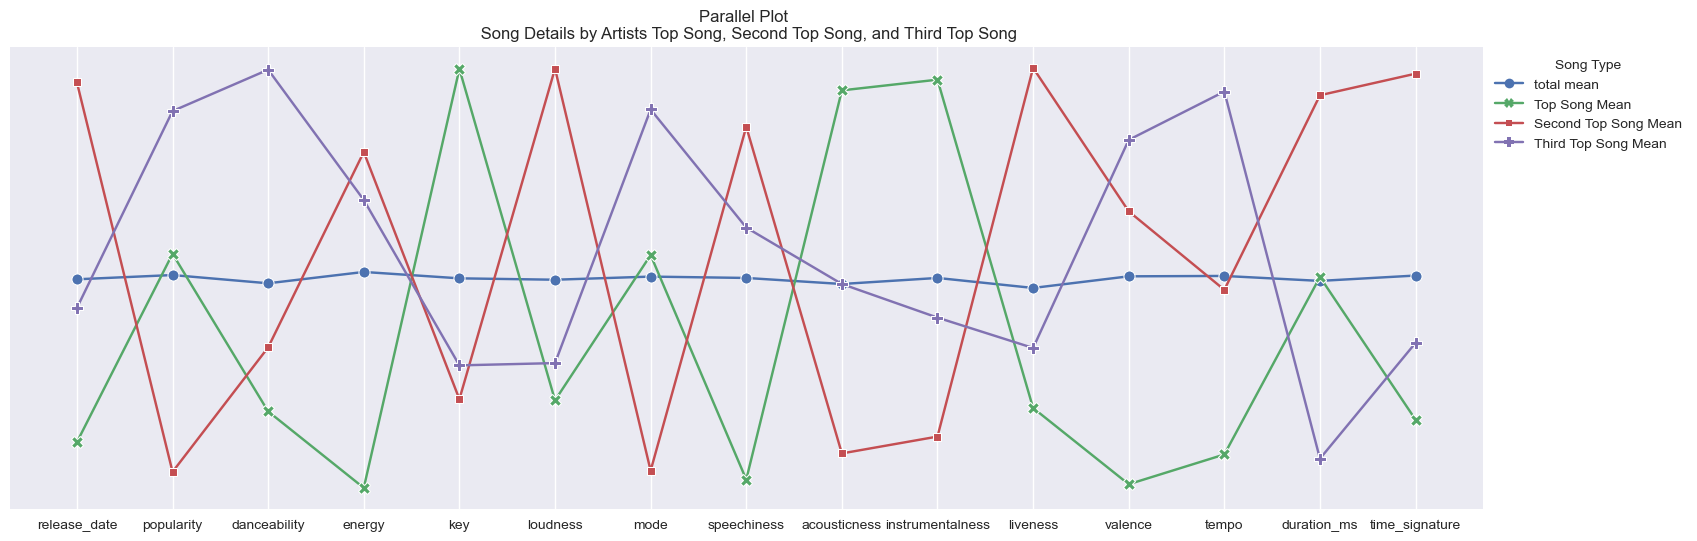

In [256]:
# Create parallel plot
plt.figure(figsize=(19, 6))
parallel_plot = sns.lineplot(
    data=normalized_data.transpose(), dashes=False, markers=True, markersize=8
)

# Add title
plt.title(
    "Parallel Plot \n Song Details by Artists Top Song, Second Top Song, and Third Top Song"
)

# Remove y-axis ticks and tick labels
plt.yticks([])

# Add legend
plt.legend(
    title="Song Type",
    bbox_to_anchor=(1, 1),  # Shift legend to the right
)

# Display the chart

**This parallel plot shows the relationship between features across the means for the different song types.**

As a parallel plot does not have axis, further analysis belows shows the numeric relationship between popularity and features. 

However, this plot suggests that an artist's most popular song will be more energetic, danceable, more major key, shorter in duration, and generally more positive (valence) than the second and third top songs. 

The second top song is generally less energetic, in more of a minor key, more acoustic and more instrumental, and generally less positive than either the first or third top song. 

The third top song features are relationally more loud and talkative and more likely to have a live audience.

This hints that how the top three songs are chosen are to show a spread of an artist's music.

The song code is an extrapolated detail - explaining differences between this result and those found with numeric popularity (directly retrieved).

In [257]:
display(top_songs_features_avg)

release_date  popularity  danceability  energy    key  \
song_type                                                                     
total mean                2018.347      77.170         0.672   0.679  5.110   
Top Song Mean             2018.256      77.399         0.666   0.670  5.649   
Second Top Song Mean      2018.457      75.049         0.669   0.684  4.799   
Third Top Song Mean       2018.331      78.937         0.682   0.682  4.886   

                      loudness   mode  speechiness  acousticness  \
song_type                                                          
total mean              -6.043  0.609        0.096         0.200   
Top Song Mean           -6.111  0.613        0.092         0.216   
Second Top Song Mean    -5.924  0.573        0.099         0.186   
Third Top Song Mean     -6.090  0.640        0.097         0.200   

                      instrumentalness  liveness  valence    tempo  \
song_type                                                            
total mean                       0.011     0.168    0.533  119.601   
Top Song Mean                    0.016     0.162    0.501  117.194   
Second Top Song Mean             0.007     0.179    0.543  119.414   
Third Top Song Mean              0.010     0.165    0.554  122.087   

                      duration_ms  time_signature  
song_type                                          
total mean             227044.844           3.961  
Top Song Mean          227131.155           3.946  
Second Top Song Mean   231142.000           3.982  
Third Top Song Mean    223122.366           3.954

**From these averages we have used [tunebat.com](tunebat.com) to find the most representative song overall, and for each song type (Top Song, Second Top Song, Third Top Song). Tunebat reverse calls the Spotify API to find what features match most closely between songs. This is to give an illustrative example of what type of songs are the most popular artists in 2023 have made.**

The song best matching the overall mean of all song features is Sunday Best by Surfaces.

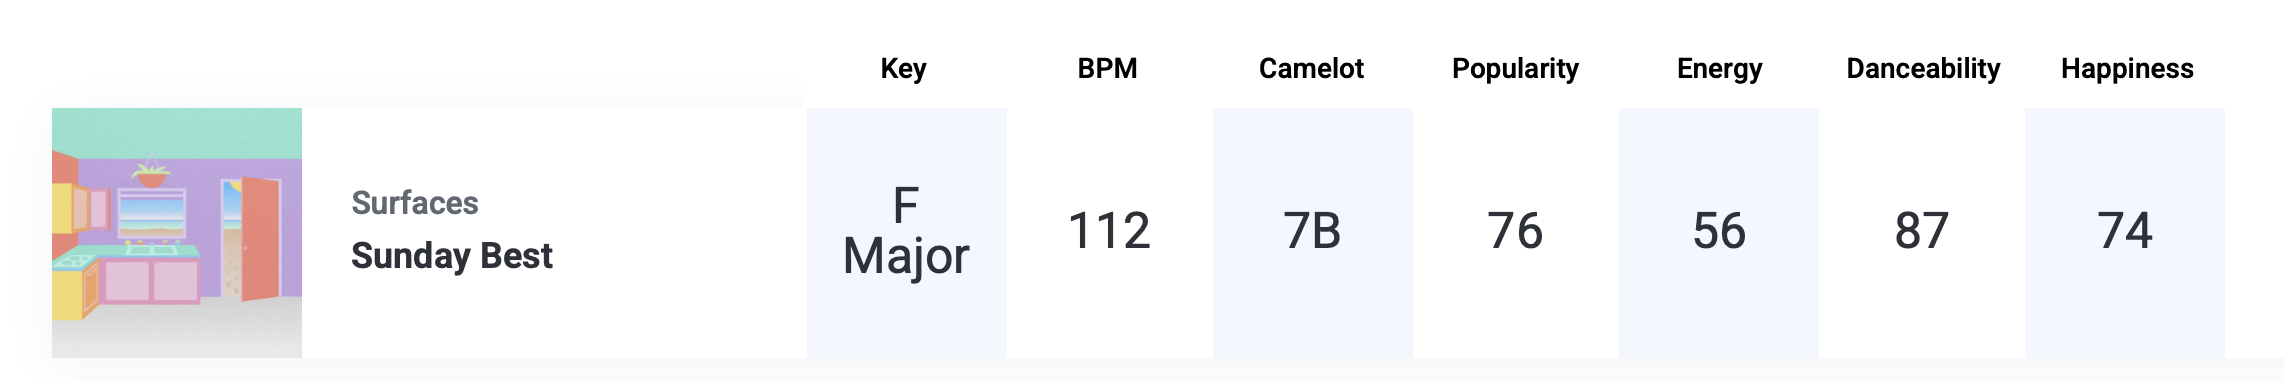

In [258]:
SundayBest = Image(filename="images/Sunday_Best.png")

# To display the image
display(SundayBest)

The song matching the first top song details most closely is Radio Ga Ga by Queen.

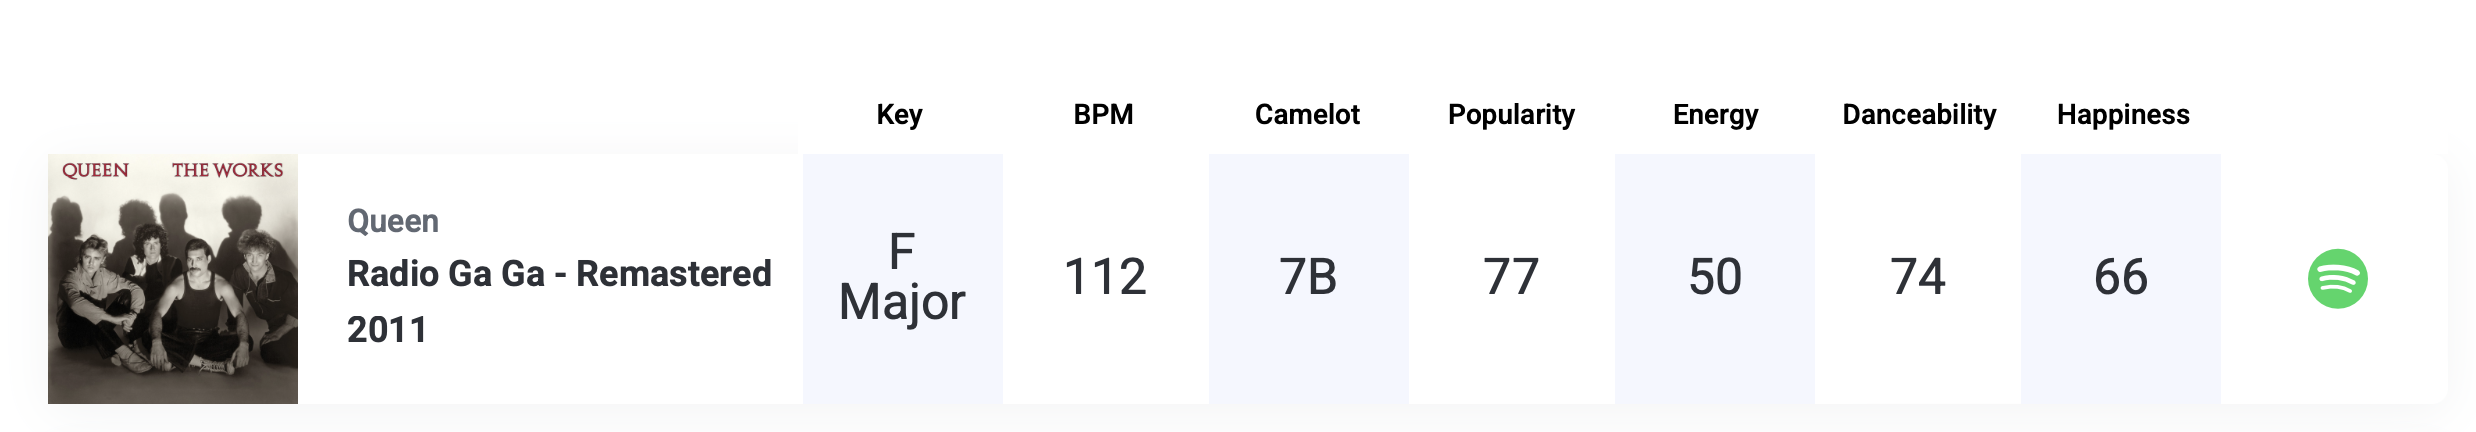

In [259]:
RadioGaga = Image(filename="images/Radio_Gaga.png")

# To display the image
display(RadioGaga)

**WordCloud showing the range of Top Artists and their popularity in 2023**

This Word Cloud shows how many times each artist has appeared on the 6 "Top Artists of 2023" playlists. It can offer an insight to which artists are popular globally.

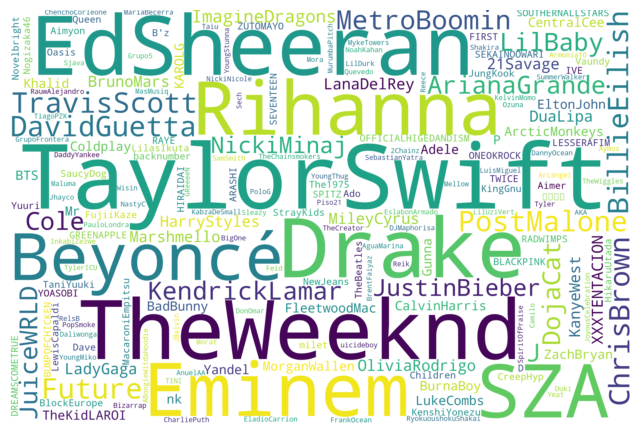

In [260]:
# Create a wordcloud of the top artists

# Create a list of all the artists
top_artists = top_artists_genre["artist_name"].tolist()

# Replace white spaces with underscores
top_artists = [re.sub(r"\s+", "_", artist) for artist in top_artists]

# Create a string of all the artists
top_artists_string = " ".join(top_artists)

# Remove underscores again
top_artists_string = re.sub(r"(_)", "", top_artists_string)


# Create a wordcloud of the top artists
wordcloud = WordCloud(
    width=3000, height=2000, collocations=False, background_color="white"
).generate(top_artists_string)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

The above word cloud shows that Taylor Swift was the most popular artists among all countries in our data set in 2023. No other artists' songs appeared more often on the countries' playlist. Taylor Swift is closely followed by Ed Sheeran, The Weekend, and Drake. The most popular, hence in the word cloud visible artists are all English speaking. This is not surprising as four of our six selected countries are English speaking. 

**Bar plot on the birthplaces and origins of Popular Artists**

Where each artist comes from offers information into where the most popular music is from.

In [261]:
# Count the number of artist per country
artists_per_origin = top_artists_genre["location"].value_counts()
artists_per_origin = pd.DataFrame(artists_per_origin)

# Reset index
artists_per_origin = artists_per_origin.reset_index()
display(artists_per_origin.head())

location  count
0          London, England     12
1      New York City, U.S.     11
2  Toronto,Ontario, Canada     10
3                    Japan     10
4   Atlanta, Georgia, U.S.     10

In [262]:
# Split the origin column by the comma and cut the last value, paste it into a new column "country"
if "location" in artists_per_origin.columns:
    artists_per_origin["location"] = artists_per_origin["location"].apply(
        lambda x: ", ".join(x.split(",")[-1:])
    )

In [263]:
# artists_per_origin = artists_per_origin.reset_index()

# Rename columns
artists_per_origin["location"] = (
    artists_per_origin["location"]
    .str.strip()
    .replace(
        {
            "US": "United States",
            "U.S.": "United States",
            "South Korea.": "South Korea",
            "England": "United Kingdom",
            "Antioquia": "Colombia",
            "Aichi Prefecture": "Japan",
        }
    )
)

# If countries are the same, sum them up
artists_per_origin = artists_per_origin.groupby(["location"]).sum()

# Reset index again after groupby
artists_per_origin = artists_per_origin.reset_index()

# Display the updated DataFrame
# display(artists_per_origin)

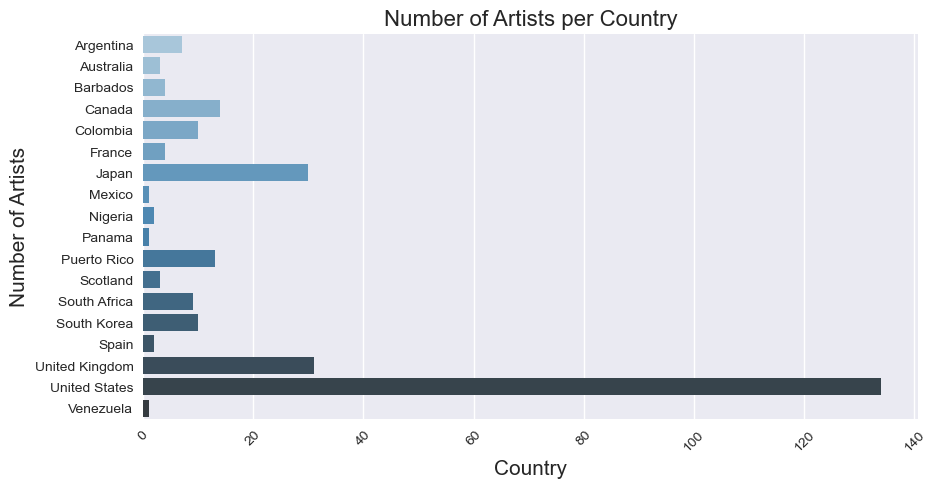

In [264]:
# Create a histograms of the number of artists per country with seaborn

# Set the style of the plot
plt.style.use("seaborn-v0_8")

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the histogram
ax = sns.barplot(x="count", y="location", data=artists_per_origin, palette="Blues_d")

# Set the title and labels
ax.set_title("Number of Artists per Country", fontsize=16)
ax.set_xlabel("Country", fontsize=15)
ax.set_ylabel("Number of Artists", fontsize=15)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

The above bar plot shows that the overwhelming majority of popular artists in 2023 originate or were born in the United States (134 in total). Artists from the United Kingdom and Japan account for the second and third most common origin places, with 31 and 30 artists respectively.

Interestingly, although Australia and Peru were two of the six chosen countries, only 3 Australian and no Peruvian artist was among the most popular artists in 2023.

**World Map showing artists per country**

In [265]:
# Create a world map with the number of artists per country

fig = px.choropleth(
    artists_per_origin,
    locations="location",
    locationmode="country names",
    color="count",
    hover_name="location",
    color_continuous_scale=px.colors.sequential.Plasma,
    range_color=[0, 140],
    title="Number of artists per country",
)
fig.show()

The world map visualises the above mentioned majority of US-originated artists. Here it becomes clearer, how little some parts of the world are represented among the top artists in 2023 (drawing from our sample). For example, other then from Japan, there are no artists from Asian countries. Despite being represented in playlists chosen, Europe only has three countries represented in artists, and the African continent only two (France, Spain, and the UK; and South Africa and Nigeria respectively).

**Analysing the release date of top songs through interactive barplot**

In [266]:
# Analyse the release dates of the top songs
# Create a pivot table of the release dates of the top songs for an interactive plot
top_songs_release_dates_pivot = pd.pivot_table(
    top_songs_features, values="song_id", index=["release_date"], aggfunc="count"
)
# Rename the column 'song_id' to 'count'
top_songs_release_dates_pivot.rename(columns={"song_id": "count"}, inplace=True)
display(top_songs_release_dates_pivot.head())

# Convert the release dates to datetime, so that they can be sorted
top_songs_release_dates_pivot.index = pd.to_datetime(
    top_songs_release_dates_pivot.index, format="mixed"
)
# print(top_songs_release_dates_pivot.index)

# Sort the release dates by time
top_songs_release_dates_pivot = top_songs_release_dates_pivot.sort_values(
    by="release_date", ascending=False
)
# print(top_songs_release_dates_pivot.head())

# Make separate dataframes for each year
for i in range(1969, 2024):
    # Only create a dataframe if the year exists in the index
    if i in top_songs_release_dates_pivot.index.year:
        # Create a dataframe for each year
        top_songs_release_dates_pivot.loc[str(i)] = top_songs_release_dates_pivot.loc[
            str(i)
        ].sort_index(ascending=False)
        # print(top_songs_release_dates_pivot.loc[str(i)].index)

count
release_date       
1969-09-26        2
1975-11-21        1
1977-02-04        2
1978-11-10        1
1987-04-13        1

In [267]:
# Create an interactive plot of the number of songs per release date

# Create a bar plot
fig = go.Figure(
    data=[
        go.Bar(
            x=top_songs_release_dates_pivot.index,
            y=top_songs_release_dates_pivot["count"],
            text=top_songs_release_dates_pivot["count"],
            textposition="auto",
            hoverinfo="x+y",
            marker_color="rgb(158,202,225)",
            marker_line_color="rgb(8,48,107)",
            marker_line_width=1.5,
            opacity=0.6,
        )
    ]
)

# Set the layout of the plot
fig.update_layout(
    title="Number of songs per date",
    xaxis_title="Release date",
    yaxis_title="Number of songs",
    font=dict(
        size=16,
    ),
    xaxis=dict(rangeslider=dict(visible=True), type="date"),
)

fig.show()

The above figure shows that the most popular songs of 2023 cover a wide range of decades. The oldest songs which were popular in 2023 were two released on the 26th of September, 1969. However, the majority of popular songs in 2023 were also released in 2023. The peak day of songs releases overall was October 13th of 2023 with eleven songs release. Due to the fact that the API updates automatically, we see some songs of 2024 (until the 2nd of January) in the timeline, too. This is because some artists featured on the top 2023 playlist have released very popular songs in 2024, which made it to their top songs in only a few days.

**Bubble Scatter Plot displaying the range and frequency of genres for all the top artists represented.**

Genre for each song is not available, each artist has a range of genres - from the very broad (pop) to the niche (permanent wave). Below is the spread of these genres.

In [268]:
# Create a total list of every genre:
genre_list = []
for index, row in top_artists_genre.iterrows():
    genre_list.append(row["artist_genre1"])
    genre_list.append(row["artist_genre2"])
    genre_list.append(row["artist_genre3"])

# Remove any nan values
genre_list = [x for x in genre_list if str(x) != "nan"]

# Remove spaces between "hip" and "hop" whenever they appear
genre_list = [x.replace("hip hop", "hiphop") for x in genre_list]

# replace r&b with rnb (can cause confusion in some further analysis)
genre_list = [x.replace("r&b", "rnb") for x in genre_list]

# print(genre_list)

In [269]:
# Create a dictionary to show all counts of genres
genre_list_unique = [{}]
for genre in genre_list:
    if genre in genre_list_unique[0]:
        genre_list_unique[0][genre] += 1
    else:
        genre_list_unique[0][genre] = 1

In [270]:
#Making genre_list_unique into a dataframe with genre and count as columns
genre_list_unique_df = pd.DataFrame.from_dict(genre_list_unique[0], orient="index")

#Adding a new column with the length of the genre name
genre_list_unique_df["length"] = genre_list_unique_df.index.str.len()

#Renaming the columns
genre_list_unique_df.columns = ["Genre Count", "Genre Length"]

#Making index into column
genre_list_unique_df.reset_index(inplace=True)

#Renaming the index column
genre_list_unique_df.rename(columns={"index": "Genre"}, inplace=True)

#Sort by genre count
genre_list_unique_df.sort_values(by="Genre Count", ascending=False, inplace=True)

In [271]:
display(genre_list_unique_df.head())

Genre  Genre Count  Genre Length
0           pop           98             3
11          rap           53             3
3        hiphop           34             6
52        j-pop           33             5
73  trap latino           24            11

In [272]:
# Create an interactive bubble chart with hover information
fig = px.scatter(genre_list_unique_df, x='Genre', y='Genre Length', size='Genre Count', color='Genre Count',
                 title='Count and variety of genres for the Top Artists of 2023',
                 labels={'Genre Count': 'Genre Count', 'Genre Length': 'Length of Genre Name', 'Genre': 'Genre Name'},
                 hover_data={'Genre': True, 'Genre Count': True, 'Genre Length': True},
                 size_max=30, color_continuous_scale='agsunset')

# Show the plot
fig.show()



The above visualisation shows the wide variety of genres and their frequency and popularity. It shows pop is the most popular (with rap, hiphop, canadian pop and dance pop following close behind). We used title length as a second variable as it can potentially allow inferences about the level of derived the genre is - pop, trap, rap, j-pop, rnb as base genres, with longer title impying derivations (contemporary country, South African country).

### 3-2. Multivariable visualisation and analysis <a id="section3-2"></a>

In this section, we will more deeply analyse the above data: including exploring how features interrelate with popularity, and genre with location. We will use the following methods:

* Correlation analysis
* Random Forest Analysis
* Binary Classification

Specifically, here we explain the advantages of these methods for our data set.

**Partial Least Squares (PLS) Regression:**

It can handle any multicollinearity between features like danceability, energy, and loudness, extracting the most relevant information for predicting song popularity. It's effective for dimensionality reduction, helping to identify the most significant features from a potentially large set. PLS maintains the relationship between these features and the target variable (popularity), providing interpretable components that directly relate to prediction.

**Random Forest:**

Its ability to model complex, non-linear relationships that may exist between features and song popularity is advantageous for our dataset. It's robust to overfitting, making it reliable even when the dataset has many features. The model also offers important insights through feature importance rankings, highlighting which features like danceability, loudness, or tempo are most predictive of a song's popularity, without requiring extensive preprocessing or assumption about the distribution of the features.

#### 3-2-1. Scatterplot of song features and popularity <a id="section3-2-1"></a>

First we visualise the relationship between the song features and numeric popularity using scatterplots - these help give a visual representation as well as showing a quantitative relationship.

In [273]:
# Select the numerical features and popularity from top_songs_features
top_songs_features_num = top_songs_features.iloc[:, 4:]
# Filter the dataframe to only include numerical features and popularity
top_songs_features_num.drop(
    columns=["release_date", "key", "mode", "time_signature", "song_code"],
    inplace=True,
)
# Drop NaN values
top_songs_features_num.dropna(inplace=True)
top_songs_features_num.head()

popularity  danceability  energy  loudness  speechiness  acousticness  \
0          99         0.552   0.702    -5.707       0.1570        0.1170   
1          93         0.596   0.658    -7.346       0.0360        0.0504   
2          92         0.637   0.643    -6.571       0.0519        0.1300   
3          92         0.663   0.670    -8.399       0.2710        0.0464   
4          92         0.645   0.729    -4.560       0.0528        0.0377   

   instrumentalness  liveness  valence    tempo  duration_ms  
0          0.000021     0.105    0.564  169.994     178427.0  
1          0.000000     0.127    0.176  100.012     229478.0  
2          0.000002     0.142    0.533   97.008     200690.0  
3          0.000089     0.205    0.138  136.952     260111.0  
4          0.000000     0.384    0.142  146.010     319192.0

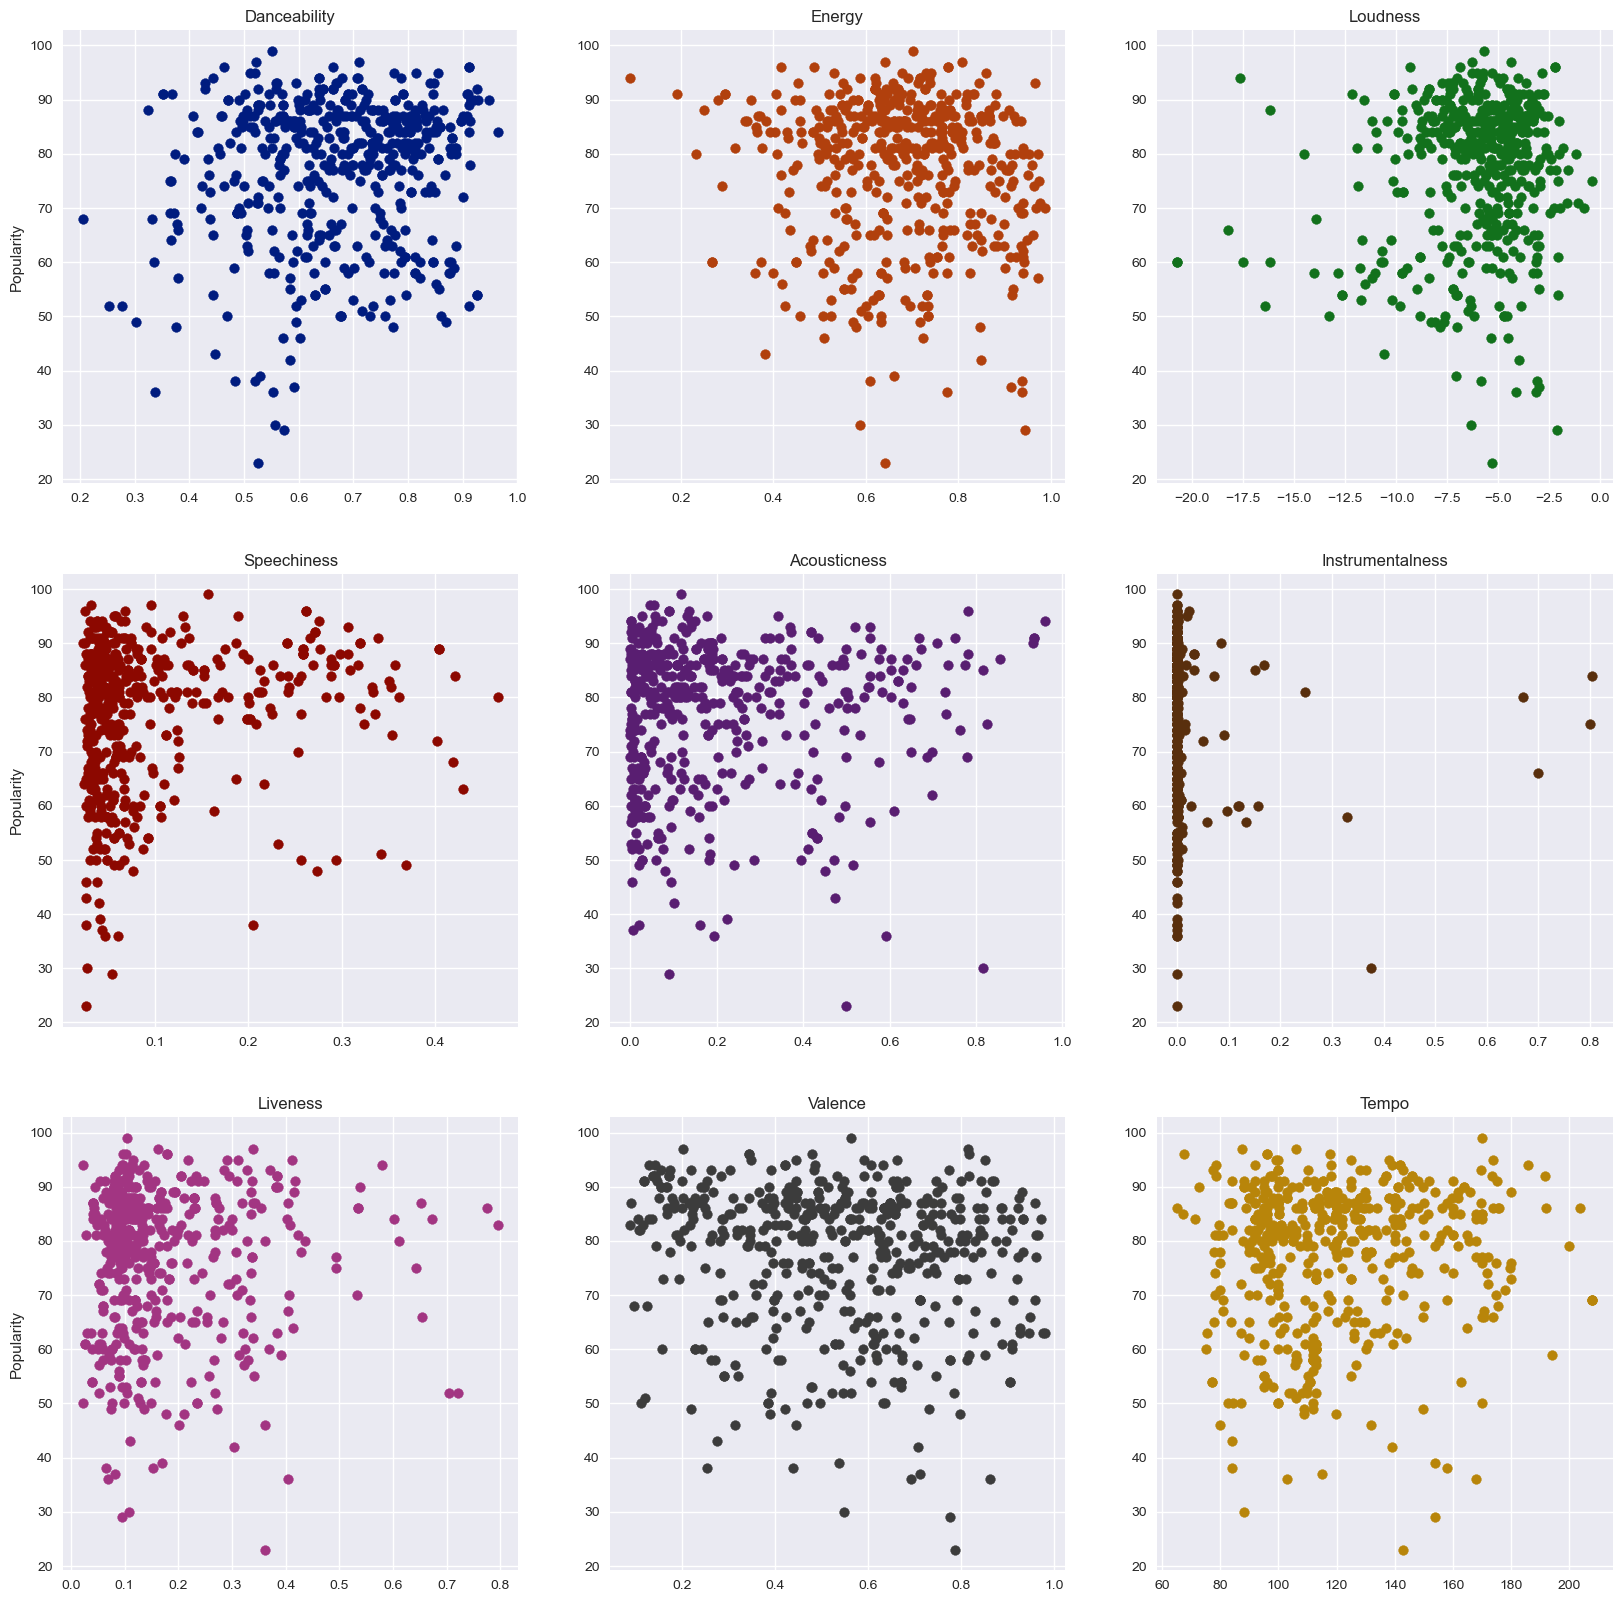

In [274]:
# Define a color palette
colors = sns.color_palette("dark", 9)

# Visualise the distribution of the numerical features against popularity
fig, ax = plt.subplots(3, 3, figsize=(20, 20))

# Scatter plots with different colors
ax[0, 0].scatter(
    top_songs_features_num["danceability"],
    top_songs_features_num["popularity"],
    color=colors[0],
)
ax[0, 1].scatter(
    top_songs_features_num["energy"],
    top_songs_features_num["popularity"],
    color=colors[1],
)
ax[0, 2].scatter(
    top_songs_features_num["loudness"],
    top_songs_features_num["popularity"],
    color=colors[2],
)
ax[1, 0].scatter(
    top_songs_features_num["speechiness"],
    top_songs_features_num["popularity"],
    color=colors[3],
)
ax[1, 1].scatter(
    top_songs_features_num["acousticness"],
    top_songs_features_num["popularity"],
    color=colors[4],
)
ax[1, 2].scatter(
    top_songs_features_num["instrumentalness"],
    top_songs_features_num["popularity"],
    color=colors[5],
)
ax[2, 0].scatter(
    top_songs_features_num["liveness"],
    top_songs_features_num["popularity"],
    color=colors[6],
)
ax[2, 1].scatter(
    top_songs_features_num["valence"],
    top_songs_features_num["popularity"],
    color=colors[7],
)
ax[2, 2].scatter(
    top_songs_features_num["tempo"],
    top_songs_features_num["popularity"],
    color=colors[8],
)

# Set titles for each subplot
ax[0, 0].set_title("Danceability")
ax[0, 1].set_title("Energy")
ax[0, 2].set_title("Loudness")
ax[1, 0].set_title("Speechiness")
ax[1, 1].set_title("Acousticness")
ax[1, 2].set_title("Instrumentalness")
ax[2, 0].set_title("Liveness")
ax[2, 1].set_title("Valence")
ax[2, 2].set_title("Tempo")
# Label the y-axis as popularity
ax[0, 0].set_ylabel("Popularity")
ax[1, 0].set_ylabel("Popularity")
ax[2, 0].set_ylabel("Popularity")

plt.show()

The chart displays a series of scatter plots mapping the relationship between various audio features of songs and their popularity. Here's a brief analysis of each plot:

- Danceability vs Popularity: There appears to be a positive trend; as danceability increases, popularity tends to increase as well. This suggests that more danceable songs are often more popular.

- Energy vs Popularity: The plot shows a cluster of points across the range of energy levels without a clear trend. Energy alone may not be a strong predictor of popularity.

- Loudness vs Popularity: Most of the popular songs are clustered towards higher loudness levels, indicating that louder songs tend to be more popular.

- Speechiness vs Popularity: There's a dense cluster of songs with low speechiness that have a wide range of popularity scores. High speechiness doesn't appear to be common in popular songs.

- Acousticness vs Popularity: The plot shows a spread of points with no clear trend, suggesting that acousticness alone doesn't have a strong linear relationship with popularity.

- Instrumentalness vs Popularity: There's a concentration of songs with low instrumentalness across various levels of popularity. High instrumentalness is rare in the most popular songs, which may indicate a preference for vocal tracks.

- Liveness vs Popularity: The data points are widely spread without a clear trend, indicating that liveness by itself isn't a strong indicator of song popularity.

- Valence vs Popularity: The plot does not show a clear pattern, implying that the mood or positivity of a song does not have a straightforward relationship with its popularity.

- Tempo vs Popularity: The scatter plot shows a wide dispersion of tempo across songs with different popularity levels, indicating no clear trend between tempo and popularity.

#### 3-2-2. Analysing correlationships between features and popularity <a id="section3-2-2"></a>

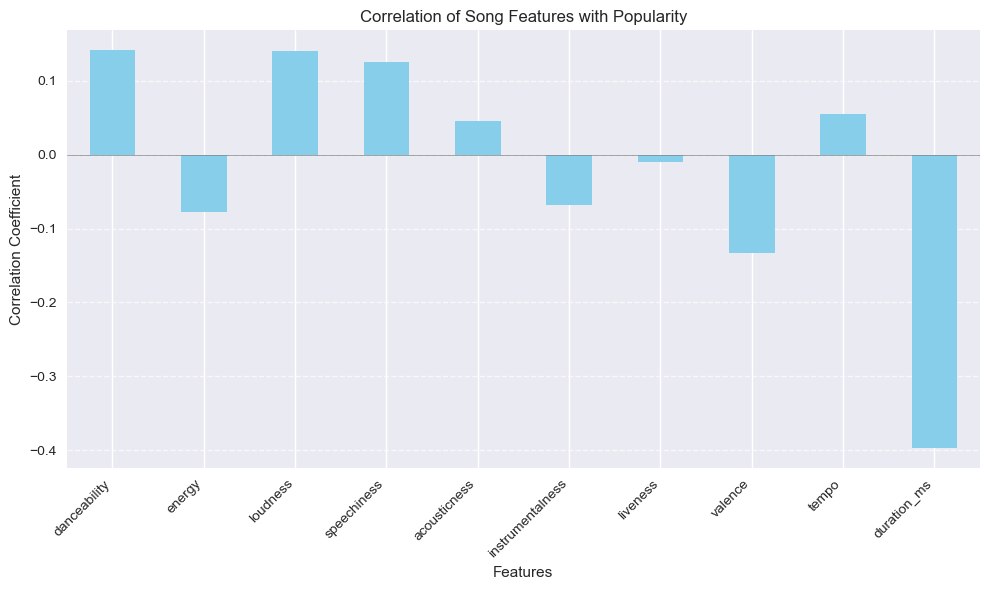

In [275]:
# Dropping the 'popularity' column from the correlation series for visualization
popularity_correlation = top_songs_features_num.corr()["popularity"].drop("popularity")

# Creating a bar plot for the correlation values
plt.figure(figsize=(10, 6))
popularity_correlation.plot(kind="bar", color="skyblue")
plt.title("Correlation of Song Features with Popularity")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.axhline(0, color="grey", linewidth=0.5)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()

**Danceability** shows the most positive correlation with popularity, suggesting that songs that are more danceable tend to be more popular.

**Duration (duration_ms)** has the most negative correlation with popularity, indicating that longer songs are less popular.

Other features such as loudness, speechiness, and acousticness show a mild 
positive correlation with popularity.
Features like valence, mode, energy, and instrumentalness have a mild negative correlation with popularity.

**PLS Regression**

In [276]:
# Preparing the data
X = top_songs_features_num.drop(columns=["popularity"])
# Features
y = top_songs_features_num["popularity"]  # Target variable

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PLS Regression
pls = PLSRegression(n_components=2)
pls.fit(X_scaled, y)

# Extracting the feature importance
feature_importance = pls.coef_.ravel()

# Creating a DataFrame for feature importance
feature_importance_df = pd.DataFrame(
    {"Feature": X.columns, "Importance": feature_importance}
)
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)
# Calculate MSE and R2
y_pred = pls.predict(X_scaled)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Describing the model
print("PLS Regression")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

display(feature_importance_df)

PLS Regression
Mean Squared Error: 138.52652460808076
R2 Score: 0.22982936375539054


Feature  Importance
0      danceability    2.297390
2          loudness    1.420814
8             tempo    0.792897
3       speechiness    0.626475
4      acousticness    0.251623
6          liveness   -0.192741
5  instrumentalness   -0.195369
1            energy   -1.878743
7           valence   -2.580922
9       duration_ms   -4.844258

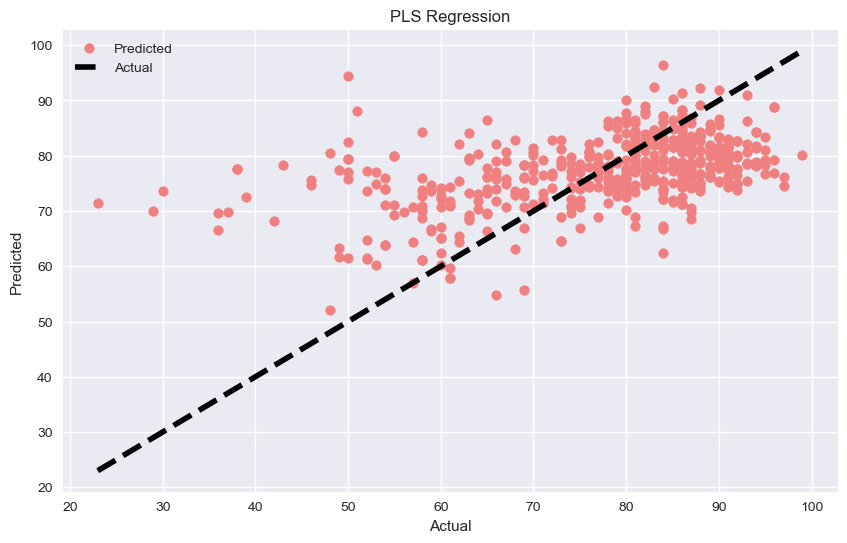

In [277]:
# Add scatter plot for visualising the PLS regression
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y, y_pred, color="lightcoral")
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.legend(["Predicted", "Actual"])
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.set_title("PLS Regression")
plt.show()

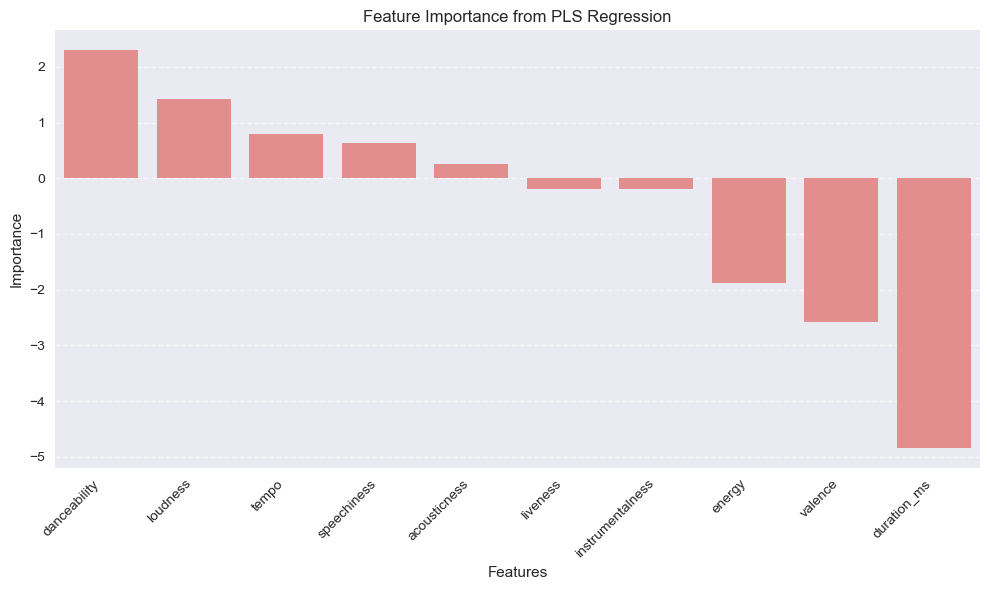

In [278]:
# Visualizing the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Feature", y="Importance", data=feature_importance_df, color="lightcoral")
plt.title("Feature Importance from PLS Regression")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

**Model Performance**
Mean Squared Error (MSE): The MSE of the model on the test data is approximately 138.52.

R-squared (R²) Score: The PLS model explains about 22.9% of the variance in the dataset, which is low, indicating a modest fit to the data.

**Positive Influence on Popularity:**

Danceability has the strongest positive influence on popularity. This aligns with the correlation analysis, suggesting that more danceable songs are generally more popular.
Loudness and Tempo also positively influence popularity, indicating that louder and faster-paced songs tend to be more popular.

**Negative Influence on Popularity:**

Duration_ms (song length) has the most substantial negative influence, confirming the earlier finding that longer songs tend to be less popular.
Valence (musical positiveness) and Energy surprisingly have a negative influence, suggesting that songs that are less positive and less energetic might be associated with higher popularity in this dataset.
Other Features:

Features like Time Signature, Acousticness, and Liveness have relatively minor influences on popularity.

#### 3-2-3. Random Forest Analysis <a id="section3-2-3"></a>

In [279]:
# Preparing the data (X and y are already defined)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Training the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Extracting feature importances
feature_importances = rf_model.feature_importances_
feature_importances_df = pd.DataFrame(
    {"Feature": X.columns, "Importance": feature_importances}
)
feature_importances_df = feature_importances_df.sort_values(
    by="Importance", ascending=False
)

# Describe the model
print("Random Forest Model")
print(f"MSE: {mse}")
print(f"R2: {r2}")
display(feature_importances_df)

Random Forest Model
MSE: 112.28532450980394
R2: 0.4031273212281239


Feature  Importance
9       duration_ms    0.235103
7           valence    0.122981
0      danceability    0.120247
3       speechiness    0.101987
2          loudness    0.088501
8             tempo    0.086437
1            energy    0.078711
6          liveness    0.070671
4      acousticness    0.064363
5  instrumentalness    0.031000

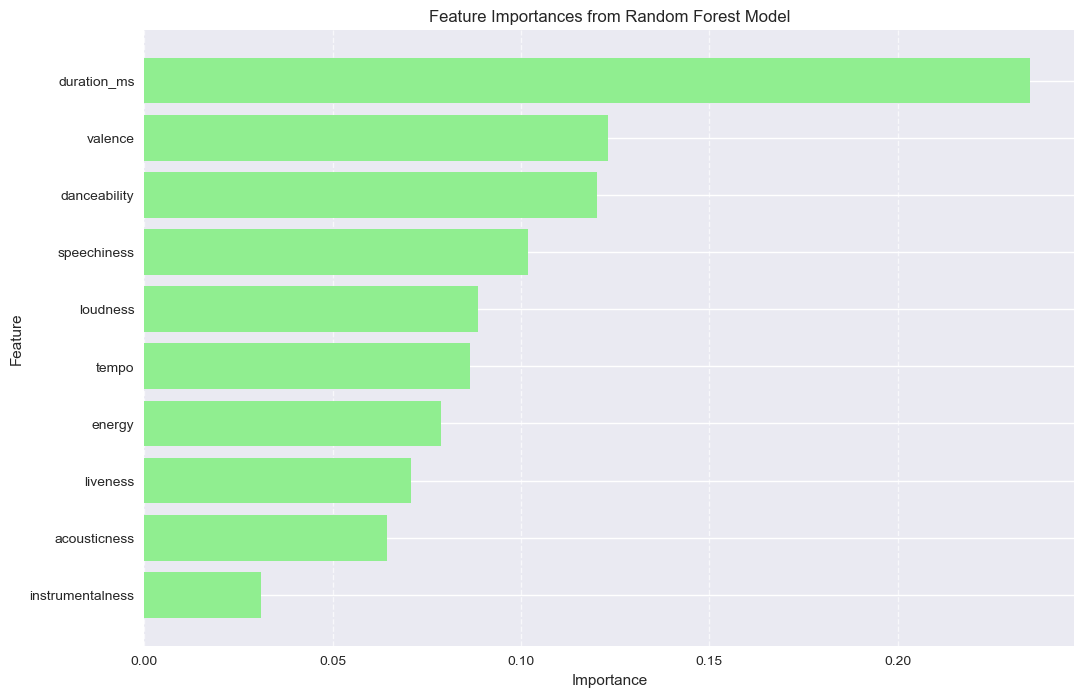

In [280]:
plt.figure(figsize=(12, 8))
plt.barh(
    feature_importances_df["Feature"],
    feature_importances_df["Importance"],
    color="lightgreen",
)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances from Random Forest Model")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

**Model Performance:**

Mean Squared Error (MSE): The MSE of the model on the test data is approximately 112.28.

R-squared (R²) Score: The Random Forest model explains about 40.3% of the variance in the dataset, which is  better than PLS regression.

**Feature Importance:**

The table and the chart list and show the features in order of their importance in predicting the target variable (popularity), as determined by the Random Forest model.
The most important features appear to be duration_ms, valence, and speechiness, suggesting that these features have the most significant impact on song popularity according to this model.

#### 3-2-4. Predicting Popular Songs with Binary Classifiers <a id="section3-2-4"></a>

Using Random Forest and Linear SVM we would like to find out how accurately we can predict the popularity of a song based on its features using our 2023 data set.

We define two classes, one being "very popular songs" with a popularity value of or above 80, on being "less popular songs" with a popularity value below 80. We chose this threshold because the dataset consists of mainly popular songs as we can see from the distribution function and the boxplot below. Although we have popularity values ranging from 23 to 99, the median lies at 81 and justifies a threshold of 80.

count    507.000000
mean      77.169625
std       13.424611
min       23.000000
25%       69.000000
50%       81.000000
75%       87.000000
max       99.000000
Name: popularity, dtype: float64

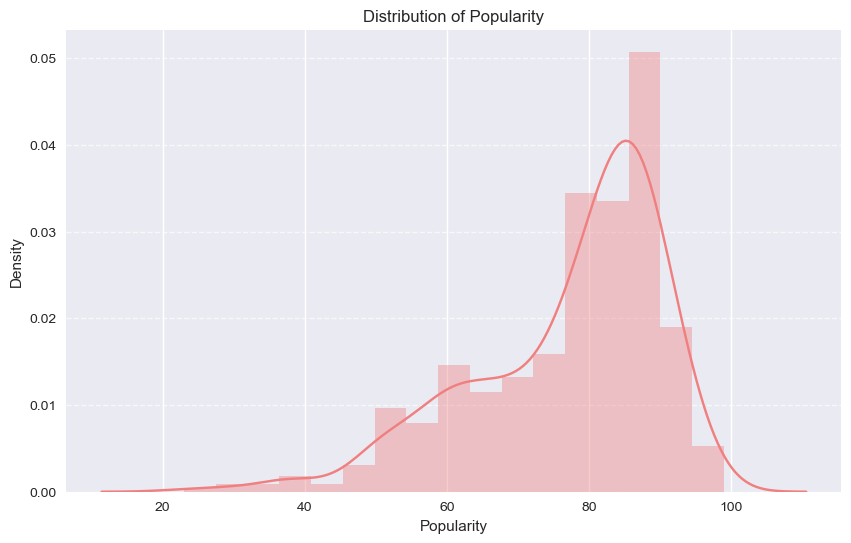

In [281]:
# Get min, max, mean, std, and median of popularity
popularity_stats = top_songs_features["popularity"].describe()
display(popularity_stats)

# Plot a distribution function of popularity
plt.figure(figsize=(10, 6))
sns.distplot(top_songs_features["popularity"], color="lightcoral")
plt.title("Distribution of Popularity")
plt.xlabel("Popularity")
plt.ylabel("Density")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

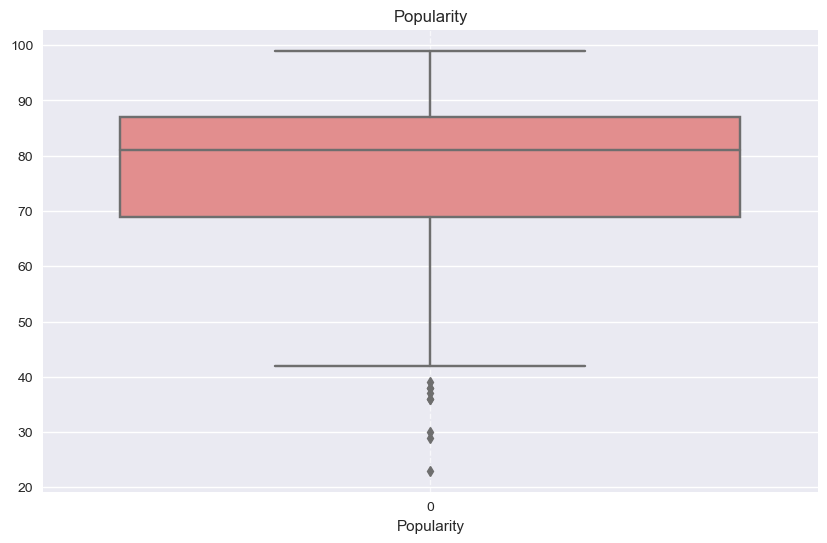

In [282]:
# Create a boxplot of popularity
plt.figure(figsize=(10, 6))
sns.boxplot(top_songs_features["popularity"], color="lightcoral")
plt.title("Popularity")
plt.xlabel("Popularity")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

**Train Random Forest and Linear SVM classifier**

In [283]:
# Define X1 and y1
X1 = top_songs_features.drop(columns=["popularity", "song_id", "song_name", "artist_id", "artist_name", "release_date", "song_code"])
y1 = top_songs_features.popularity>=80

print(y1.head())
X1.shape
print(X1.head())

0    True
1    True
2    True
3    True
4    True
Name: popularity, dtype: bool
   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.552   0.702  9.0    -5.707   1.0       0.1570        0.1170   
1         0.596   0.658  0.0    -7.346   1.0       0.0360        0.0504   
2         0.637   0.643  4.0    -6.571   1.0       0.0519        0.1300   
3         0.663   0.670  8.0    -8.399   1.0       0.2710        0.0464   
4         0.645   0.729  2.0    -4.560   1.0       0.0528        0.0377   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  
0          0.000021     0.105    0.564  169.994     178427.0             4.0  
1          0.000000     0.127    0.176  100.012     229478.0             4.0  
2          0.000002     0.142    0.533   97.008     200690.0             4.0  
3          0.000089     0.205    0.138  136.952     260111.0             4.0  
4          0.000000     0.384    0.142  146.010     319192.0             4

In [284]:
# fix the random seed for reproducibility
np.random.seed(100)
# Divide the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.5, random_state=0)

In [285]:
# Fit the models

classifier_names = ["Linear SVM", "Random Forest"]

models = [SVC(kernel="linear", C=0.025, probability=True),
            RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
]

pred_prob = {}
pred = {}

# fit individual classifiers
for name, classifier in zip(classifier_names, models):
    np.random.seed(100)
    classifier.fit(X1_train, y1_train)
    pred_prob[name] = classifier.predict_proba(X1_test)[:,1]
    # Setting threshold to 0.8
    pred[name] = np.where(pred_prob[name] >= 0.8, 1, 0)

display(pred_prob["Linear SVM"][0:5])
display(pred_prob["Random Forest"][0:5])
display(pred["Linear SVM"][0:5])
display(pred["Random Forest"][0:5])

array([0.64595836, 0.7163523 , 0.52228834, 0.63794862, 0.63602432])

array([0.76108563, 0.80497712, 0.61572385, 0.54380411, 0.77657757])

array([0, 0, 0, 0, 0])

array([0, 1, 0, 0, 0])

Evaluate the models on their accuracy and ROC curves

In [286]:
#Calculating accuarcy metric
y1_pred = pd.Series(pred["Linear SVM"])
y2_pred = pd.Series(pred["Random Forest"])

accuracy_SVM = accuracy_score(y1_test, y1_pred)
accuracy_RF = accuracy_score(y1_test, y2_pred)
print(f"Accuracy Linear SVM: {accuracy_SVM}")
print(f"Accuracy Random Forest: {accuracy_RF}")

Accuracy Linear SVM: 0.4921259842519685
Accuracy Random Forest: 0.48031496062992124


0.5222883394440314
0.4672336985102943


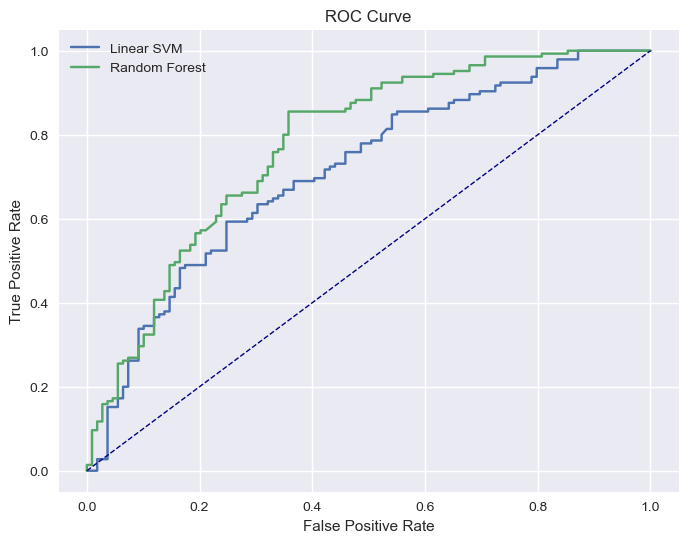

In [287]:
#Calculating ROC point of 0.5
fpr1, tpr1, thresholds1 = roc_curve(y1_test, pred_prob["Linear SVM"])
fpr2, tpr2, thresholds2 = roc_curve(y1_test, pred_prob["Random Forest"])
print(thresholds1 [fpr1 >= 0.5][0])
print(thresholds2 [fpr2 >= 0.5][0])


#Plot ROC curve of both models
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(fpr1, tpr1, label = "Linear SVM")
ax.plot(fpr2, tpr2, label = "Random Forest")
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()

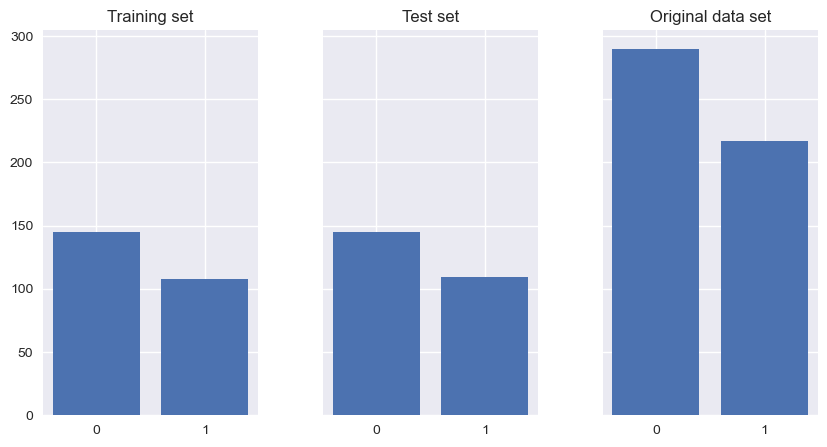

In [288]:
# Checking for imbalances in the data
fig, ax = plt.subplots(1, 3, figsize=(10, 5), sharex=True, sharey=True)
fig.subplots_adjust(wspace = 0.3, hspace = 0.5)

ax[0].bar(x = [0, 1], height = y1_train.value_counts())
ax[1].bar(x = [0, 1], height = y1_test.value_counts())
ax[2].bar(x = [0, 1], height = y1.value_counts())

ax[0].set_title("Training set")
ax[1].set_title("Test set")
ax[2].set_title("Original data set")

ax[0].set_xticks([0, 1])
ax[1].set_xticks([0, 1])
ax[2].set_xticks([0, 1])

plt.show()

We can see that the Random Forest Model performs slightly better in predicting the popularity of a song based on our database than the Linear SVM model. However, both models show not very steep curves and comparibly low accuracy rates. This might be due to a rather small database or the imbalanced classes within the dataset and shows the limitations of our research.

## 4. Conclusion <a id="section4"></a>

Returning to our research question **Which features does the music and the most popular artists of 2023 have?**, we have gained the following insights for each sub-question.

**1. Which countries are the most popular artists from?**

The majority of the popular artists in 2023 originate from or were born in the United States, with 134 artists in total. Artists from the United Kingdom and Japan account for the second and third most common origin places with 31 and 30 artists respectively. Notably, even though Australia and Peru were among the six chosen countries for the study, only 3 Australian artists and no Peruvian artists were among the most popular artists in 2023.

**2. Which features made a song popular in 2023?**

The songs and artists of 2023 are characterized by a variety of musical features. The song features analyzed include popularity, danceability, energy, key, mode, loudness, speechiness, acousticness, instrumentalness, valence, liveness, tempo, song duration, and time signature. The most popular songs tend to be more energetic, danceable, major key, shorter in duration, and generally more positive (higher valence) compared to the second and third top songs of an artist. The second top songs are generally less energetic, more minor key, more acoustic, and instrumental, and generally less positive than either the first or third top song. The statement is supported by the parallel plot and statistical analysis of the song features. These features suggest that songs which are more upbeat, rhythmic, and convey positive emotions were more likely to be popular.

**3. Can we see a correlation of popular genres, artists, and origin of artists?**

There is a visible correlation between popular genres, artists, and the origin of artists. The most popular artists, such as Taylor Swift, Ed Sheeran, The Weekend, and Drake, predominantly come from English-speaking countries, which is not surprising given that four of the six selected countries for the study are English-speaking. The analysis of genres shows a wide range of musical styles from pop, hip-hop, contemporary R&B, to niche genres like permanent wave. This diversity in genres and the predominance of artists from certain countries illustrate a moderate correlation between the musical styles, artists' popularity, and their geographical origins.

Despite the comprehensive nature of the analysis, limitations included potential biases in the Spotify algorithm and data availability issues and did not allow for a strong prediction acurracy of the two trained models. However, the robust methodology and data cleaning processes ensured the reliability of the findings.


## 5. References <a id="references"></a>
- [Spotify Web API Documentation.](https://developer.spotify.com/documentation/web-api)

- [Spotipy (a Python library for the Spotify Web API) Documentation.](https://spotipy.readthedocs.io/en/2.22.1/)